### <p style="background-color:#627D50;color:#D1CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Projet 6** : Classifiez automatiquement des biens de consommation </p>

<img src="place_marche.png" align="right" alt="Alternative text" />

Vous êtes ***Data Scientist*** au sein de l'entreprise ***Place de marché***, qui souhaite lancer une marketplace e-commerce.

Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.

Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs, et est donc **peu fiable**. De plus, le volume des articles est pour l'instant très petit.

Pour une meilleure expérience des vendeurs et des acheteurs, et dans l'optique d'un passage à l'échelle, ***il devient nécessaire d'automatiser cette tâche***.

*************************
- Mentor [**Babou M'BAYE**]()
- Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/)
- Parcours [*Data Scientist*]()
- Ecole [*OpenClassrooms*](https://openclassrooms.com/fr)
- Date : [Juillet 2023]()

<!-- <style>
.right-align {
    text-align: right;
}
</style>

<ul class="right-align">
    <li>Mentor [**Babou M'BAYE**]()</li>
    <li>Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/){:target="_blank"}</li>
    <li>Parcours [*Data Scientiste*]()</li>
</ul>
--- -->

[<font color="#337da4"> <h5> Problématique](#contexte)</h5>
[<font color="#337da4"> <h5> 1. Librairies](#1)</h5>
[<font color="#337da4"> <h5> 2. Jeu de données](#2)</h5>
> [2.1 Chargement](#2.1)<br>
> [2.2 Description des variables](#2.2)<br>
> [2.3. Différentes types de variables](#2.3)<br> 
> [2.4. Valeurs manquantes](#2.4)<br> 
> [2.5 Nettoyage ](#2.5)<br> 
    
[<font color="#337da4"> <h5> 3. Exploration](#3)</h5>
[<font color="#337da4"> <h5> 4. Données Textuelles](#4)</h5> 

> [4.1 Prétraitement des données ou preprocessing](#4.1)<br> 
> [4.2 Approche Bag-of-words](#4.2)<br> 
> [4.3 Tf-idf](#4.3)<br> 
> [4.4 Approche word/sentence embedding](#4.4)<br> 
> [4.5 Approche BERT](#4.5)<br> 
> [4.6 Approche USE](#4.6)<br> 
> [4.7 Comapraison des approches ](#4.7)<br>  

### <font color="#337da4" id="contexte">Problématique </font>
----------------------------

**Contexte**
*****
L' entreprise **Place de marché souhaite** lancer une marketplace e-commerce. Pour cela, les vendeurs doivent attribuer une catégorie manuellement à leurs produits à partir d'une description et d'une photo.  Afin de passer à une plus large échelle et faciliter le processus, il devient nécessaire d'automatiser cette tâche.

**Mission**
*****
Réaliser une première **étude de faisabilité** d'un moteur de **classification d'articles** basé sur une **image et une description** pour l'**automatisation** de l'attribution de la **catégorie de l'article**.

**Objectifs**
*****
- analyser le jeu de données,
- réaliser :
    > un prétraitement des descriptions des produits<br>
    > une réduction de dimension, <br>
    > un prétraitement des images,<br>
    > puis un clustering. 

La représentation graphique aidera à convaincre que cette approche de modélisation permettra bien de regrouper des produits de même catégorie.

**Contraintes**
*****

Afin d'extraire les features texte, il sera nécessaire de mettre en oeuvre : 
- deux approches de type **bag-of-words**, comptage simple de mots et **Tf-idf** ;<br>
- une approche de type **word/sentence embedding** classique avec Word2Vec (ou Glove ou FastText) ;<br>
- une approche de type word/sentence embedding avec **BERT** ;<br>
- une approche de type word/sentence embedding avec **USE** (Universal Sentence Encoder). 

**Sources**
*****

Pour cette mission, le jeu de données est disponible [ici](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip)

**Livrables :**

Afin de répondre à cette mission, trois notebook seront été réalisés : 
>  ***Notebook 1*** : Analyse des données textuelles (description) et clusterisation <br>
>  ***Notebook 2*** : Analyse des données visuelles (images) et clusterisation<br>
>  ***Notebook 3*** : Combinaison du meilleur modèle de texte et d'image et classification supervisée<br>
>  ***Presentation***: Support de presentation. 

### <font color="#337da4" id="1">1. Librairies </font>
----------------------------

In [1]:
%%time
# Built-in
import os, warnings 
from tqdm import tqdm
from tqdm.notebook import tqdm

# Data
import numpy as np
import pandas as pd
import sidetable

#Visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import plotly.express as px
# !pip install dataframe_to_image
import dataframe_image as dfi

# NLP
import nltk #/!\ attention use nltk.download('punkt')
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords


# Cluster
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# metrics
from sklearn.metrics import (silhouette_samples,silhouette_score, adjusted_rand_score,
                             adjusted_mutual_info_score,confusion_matrix, pair_confusion_matrix,
                            ConfusionMatrixDisplay)

# date
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

# from markdown import Markdown
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

# Appel de mes propres functions
from function_nlp import *

# Chemin
# imgPath='C:/Users/Fane0763/OpenClassroom/OC Projet 6/Graphs/'
SAVE_IMAGES = True

# Nombre aléatoire pour la reproductibilité des résultats
random_state = 42

class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'
    
# Affichage des valeurs
# pd.set_option('display.max_colwidth', None)

# Police et reglages
font_title = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 16,}
font_title2 = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 12,}
font_title3 = {'family': 'serif', 'color':  '#4F6272', 'weight': 'bold', 'size': 10,}

mycolors = ["black", "hotpink", "b", "#4CAF50"]
AllColors=['#99ff99', '#66b3ff', '#4F6272', '#B7C3F3', '#ff9999', '#ffcc99', '#ff6666', '#DD7596', '#8EB897',
           '#c2c2f0', '#DDA0DD', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 
           '#7f7f7f', '#bcbd22', '#17becf', '#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33',
           '#a65628', '#f781bf', "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

%matplotlib inline

CPU times: total: 3.97 s
Wall time: 8.59 s


In [2]:
# Variable pour définir l'environnement (local ou colab)
ENV = 'local'

# Configuration des chemins de dossiers pour les différents environnements
if ENV == 'local':
    # Développement local
    DATA_FOLDER = './Flipkart'

    
# Définition des chemins de dossiers pour l'environnement Colab
if ENV == 'colab':
    # Colaboratory - décommentez les 2 lignes suivantes pour connecter à votre drive
    # from google.colab import drive
    # drive.mount('/content/drive')
    DATA_FOLDER = '/content/drive/MyDrive/data/OC6'
    # OUT_FOLDER = '/content/drive/MyDrive/data/OC6'
    # IMAGE_FOLDER = '/content/drive/MyDrive/images/OC6/cv'

# Création d'une variable IMG_FOLDER pour le chemin complet du dossier d'images
IMG_FOLDER = os_path_join(DATA_FOLDER,'Images')
OUT_FOLDER = f'{DATA_FOLDER}/output'
IMAGE_FOLDER = f'{DATA_FOLDER}/Images'
GRAPH_FOLDER= os_path_join(DATA_FOLDER,'Graphs') # graphique pour les diapos
    
SAVE_IMAGES = True
# imgPath = f'{DATA_FOLDER}/Graphs'
# if not os.path.exists(imgPath[:-1]):
#     os.makedirs(imgPath[:-1])


# Crée les dossiers spécifiés s'ils n'existent pas déjà
os_make_dir(IMAGE_FOLDER)
os_make_dir(OUT_FOLDER)
os_make_dir(GRAPH_FOLDER)  # graphique pour les diapos
imgPath=f'{GRAPH_FOLDER}/'
print(GRAPH_FOLDER)  

os.listdir(DATA_FOLDER)[:5]

./Flipkart/Graphs


['flipkart_com-ecommerce_sample_1050.csv',
 'Graphs',
 'Images',
 'Images_process',
 'output']

In [3]:
import psutil
psutil.cpu_count(logical=False)

4

In [4]:
# pandarallel
pandarallel.initialize(progress_bar=True,
                       nb_workers=4,
                       # verbose=1, 
                      )   


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


### Version des bibliothèques

In [5]:
from platform import python_version

python_version()
print(clr.start+'Versions des bibliothèques utilisées: :.'+clr.end)
print(clr.color+'*' * 39+clr.end)
print(''.join(f'{m.__name__}=={m.__version__}''\n' for m in globals(
).values() if getattr(m, '__version__', None)))

Versions des bibliothèques utilisées: :.
***************************************
numpy==1.24.3
pandas==1.5.3
sidetable==0.9.1
missingno==0.5.2
seaborn==0.12.2
PIL.Image==9.4.0
nltk==3.7
psutil==5.9.5



#### Configuration

In [6]:
from sklearn import set_config

# pd.set_option('display.max_columns', 200)  # pour afficher toutes les colonnes
# pd.set_option('display.max_rows', 20)  # pour afficher max 10 lignes
# pd.set_option('display.max_colwidth', 100)  # pour afficher toutes la text
# pd.set_option('display.precision', 2)
# pd.options.display.float_format = '{:.2f}'.format  # currency, lat,lng

# %matplotlib inline
# sns.set_theme(style="white", context="notebook")
# sns.set_color_codes("pastel")
# sns.set_palette("tab20")

set_config(display='diagram')
# displays HTML representation in a jupyter context
SAVE_IMAGES=True

def sanitize(fig_name: str) -> str:
    """Enlever les caractères interdits dans les filenames ou filepaths"""
    return (fig_name.replace(' ', '_').replace(':', '-')
            .replace('.', '-').replace('/', '_').replace('>', 'gt.')
            .replace('_\n', '').replace('\n', '').replace('<', 'lt.'))


def to_png(graph_folder=GRAPH_FOLDER, fig_name=None) -> None:
    """
    Register the current plot figure as an image in a file.
    Must call plt.show() or show image (by calling to_png() as last row in python cell)
    to apply the call 'bbox_inches=tight', to be sure to include the whole title / legend
    in the plot area.
    """

    def get_title() -> str:
        """find current plot title (or suptitle if more than one plot)"""
        if plt.gcf()._suptitle is None:  # noqa
            return plt.gca().get_title()
        else:
            return plt.gcf()._suptitle.get_text()  # noqa

    if SAVE_IMAGES:
        if fig_name is None:
            fig_name = get_title()
        elif len(fig_name) < 9:
            fig_name = f'{fig_name}_{get_title()}'
        fig_name = sanitize(fig_name)
        print(f'"{fig_name}.png"')
        plt.gcf().savefig(
            # f'{IMAGE_FOLDER}/{fig_name}.png', bbox_inches='tight')
            os_path_join(graph_folder, f'{fig_name}.png'),
            bbox_inches='tight')

### <font color="#337da4" id="2">2. Jeu de données </font>
----------------------------
#### <font color="#337da4" id="2.1">2.1 Chargement </font>
Nous allons charger la base de données pour exploration et traitement. 

In [7]:
dfmarket=pd.read_csv(os_path_join(DATA_FOLDER,'flipkart_com-ecommerce_sample_1050.csv'))
dfmarket.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [8]:
dfmarket.tail(3)

uniq_id            crawl_timestamp  \
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1190.0             595.0  f2f027ad6a6df617c9f125173da71e44.jpg   

      is_FK_Advantage_product  \
1047                    False   
1048                    False   
1049                    False   

                                            description       product_rating  \
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  No rating available   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  No rating available   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...                    4   

           overall_rating       brand  \
1047  No rating available    Uberlyfe   
1048  No rating available  Wallmantra   
1049                    4    Uberlyfe   

                                 product_specifications  
1047  {"product_specification"=>[{"key"=>"Number of ...  
1048  {"product_specification"=>[{"key"=>"Number of ...  
1049  {"product_specification"=>[{"key"=>"Sales Pack...

In [9]:
dfmarket.sample(3)

uniq_id            crawl_timestamp  \
977  967d91e162afb44a67c0281f71766e4d  2016-03-12 22:17:22 +0000   
66   903d63e2b71d692ccd628e1de516516e  2016-06-10 21:33:30 +0000   
424  1be8161a259813bca5d068d5730464e7  2016-06-17 07:53:02 +0000   

                                           product_url  \
977  http://www.flipkart.com/fs-mini-klub-baby-girl...   
66   http://www.flipkart.com/chhote-janab-cozy-matt...   
424  http://www.flipkart.com/majik-styling-decorati...   

                                       product_name  \
977               FS Mini Klub Baby Girl's Bodysuit   
66   CHHOTE JANAB COZY MATTRESS PROTECTOR(SET OF 2)   
424              Majik Styling Decoration Hair Clip   

                                 product_category_tree               pid  \
977  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  BOLEGFY8YSH25ZWZ   
66   ["Baby Care >> Baby Bedding >> Baby Mattresses...  MREEJ2KWFDXWBWCJ   
424  ["Beauty and Personal Care >> Hair Care >> Hai...  HACEJQY5FQRZZUGM   

     retail_price  discounted_price                                 image  \
977         599.0             599.0  967d91e162afb44a67c0281f71766e4d.jpg   
66          399.0             320.0  903d63e2b71d692ccd628e1de516516e.jpg   
424         199.0             199.0  1be8161a259813bca5d068d5730464e7.jpg   

     is_FK_Advantage_product  \
977                    False   
66                     False   
424                    False   

                                           description       product_rating  \
977  Key Features of FS Mini Klub Baby Girl's Bodys...  No rating available   
66   Specifications of CHHOTE JANAB COZY MATTRESS P...  No rating available   
424  Key Features of Majik Styling Decoration Hair ...  No rating available   

          overall_rating         brand  \
977  No rating available  FS Mini Klub   
66   No rating available  CHHOTE JANAB   
424  No rating available         Majik   

                                product_specifications  
977  {"product_specification"=>[{"key"=>"Number of ...  
66   {"product_specification"=>[{"key"=>"Material",...  
424  {"product_specification"=>{"key"=>"Number of C...

In [10]:
def get_dataframe_name(df):
    """
    Cette fonction retourne le nom du dataframe en string
    :param df: dataframe
    :return: nom du dataframe en format string
    """
    name = [x for x in globals() if globals()[x] is df][0]
    return name


def get_dataframe_name2(df):
    """
    Cette fonction retourne le nom du dataframe en string
    :param df: dataframe
    :return: nom du dataframe en format string
    """
    for x in globals():
        if globals()[x] is df:
            return x

def apercu(datasets, titles):
    """
    Cette fonction fournie les stats sur une liste de base (dataframe)
    :param titles:
    :param datasets: liste de dataframe en pandas
    :return: dataframe style
    """
    # Importations
    # import pandas as pd

    # datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df,
    # category_translation_df]
    # titles=[namestr(data,globals()) for data in datasets]
    data_summary = pd.DataFrame({}, )
    data_summary['datasets'] = titles
    data_summary['columns'] = [', '.join([col for col in data.columns]) for data in datasets]
    data_summary['nb_lignes'] = [data.shape[0] for data in datasets]
    data_summary['nb_colonnes'] = [data.shape[1] for data in datasets]
    data_summary['doublons'] = [data.duplicated().sum() for data in datasets]
    data_summary['nb_NaN'] = [data.isnull().sum().sum() for data in datasets]
    data_summary['NaN_Columns'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in
                                   datasets]
    return data_summary.style.background_gradient(cmap='YlGnBu')


def apercu2(datasets, titles):
    data_summary = pd.DataFrame({}, )
    data_summary['datasets'] = titles
    data_summary['nb_lignes'] = [data.shape[0] for data in datasets]
    data_summary['nb_colonnes'] = [data.shape[1] for data in datasets]
    data_summary['doublons'] = [data.duplicated().sum() for data in datasets]
    data_summary['nb_NaN'] = [data.isnull().sum().sum() for data in datasets]

    return data_summary.style.background_gradient(cmap='YlGnBu')


In [11]:
datasets=[dfmarket]  
BaseNameString=[get_dataframe_name(data) for data in datasets]
description=apercu(datasets, BaseNameString)
description2=apercu2(datasets, BaseNameString)
# dfi.export(description2, imgPath+'datasets.png')
description

In [12]:
dfmarket.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

In [13]:
dfmarket.describe().round(2)

retail_price  discounted_price
count       1049.00           1049.00
mean        2186.20           1584.53
std         7639.23           7475.10
min           35.00             35.00
25%          555.00            340.00
50%          999.00            600.00
75%         1999.00           1199.00
max       201000.00         201000.00

#### <font color="#337da4" id="2.2"> 2.2. Description des variables </font>
----------------------------

- **uniq_id :** id de chaque image
- **crawl_timestamp :** date d'ajout
- **product_url :** url du produit sur le site
- **product_name :** nom du produit
- **product_category_tree :** catégorie donnée sous forme d'arbre (catégorie, sous-catégorie; sous-sous catégorie, ...)
- **pid :** identifiant processus
- **retail_price :** prix au détail de l'article
- **discounted_price :** Prix réduit (promotion, rabais, pour l'achat du produit en grande quantité ?)
- **image :** nom de l'image que l'on peut retrouver dans le dossier regroupant les images.
- **description :** description précise du produit
- **product_rating :** note donnée au produit
- **overall_rating :** note globale
- **brand :** marque
- **product_specifications :** Type de produit


#### <font color="#337da4" id="2.3"> 2.3. Différentes types de variables </font>
----------------------------

In [14]:
dfmarket.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [15]:
dfmarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

"TypeVarRepartition.png"


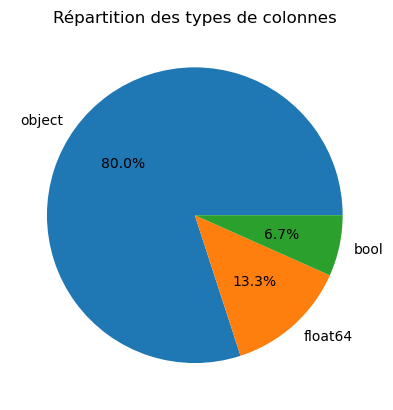

In [16]:
dfmarket.dtypes.value_counts().plot(kind='pie',autopct="%1.1f%%", title = "Répartition des types de colonnes")
to_png(fig_name='TypeVarRepartition')

"TypeVarRepartition2.png"


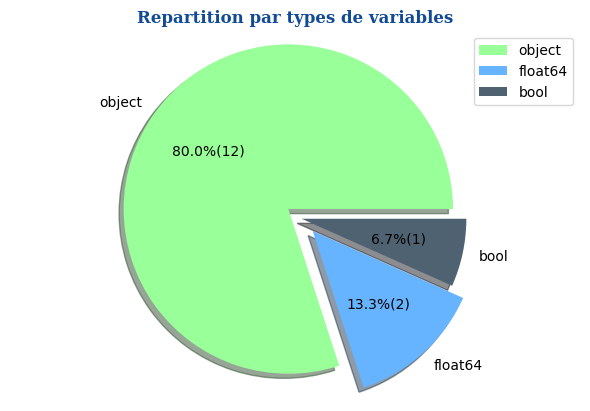

In [17]:
# Affichage des types de variables dans la base.
repartitionTypeVar(dfmarket,figsize=(6, 4))
to_png(fig_name='TypeVarRepartition2')

#### <font color="#337da4" id="2.4"> 2.4. Valeurs manquantes </font>
----------------------------

In [18]:
dfmarket.isna().sum(axis=0)

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

<Axes: >

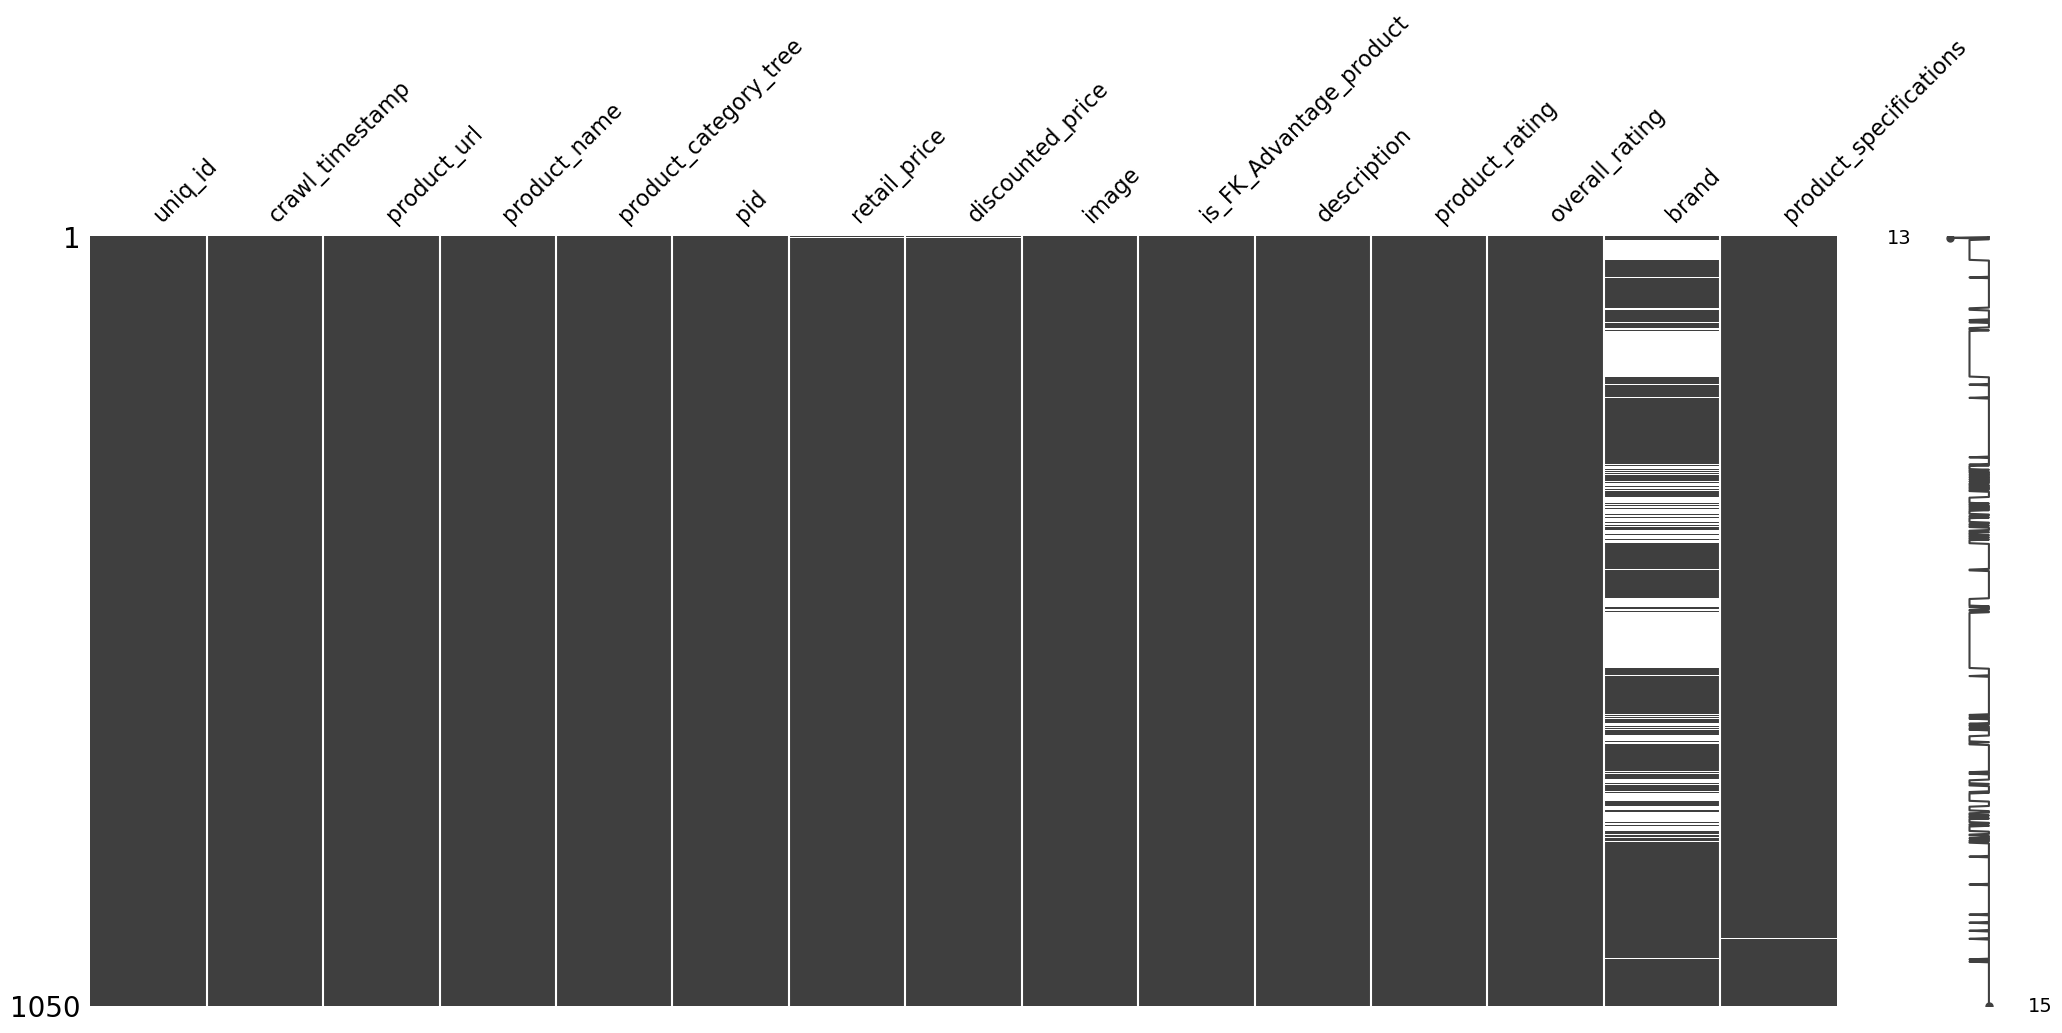

In [19]:
msno.matrix(dfmarket)

"taux1_Taux_de_completion.png"


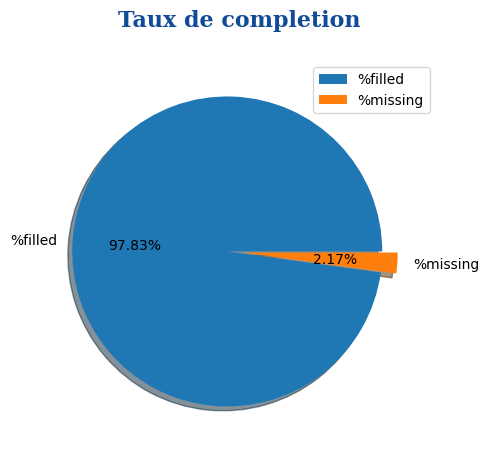

In [20]:
fillingRate(dfmarket) # , 'taux1.png'
to_png(fig_name='taux1')


In [21]:
completude(dfmarket)

Taux completion  Nb missings  %missings
uniq_id                           100.00            0       0.00
crawl_timestamp                   100.00            0       0.00
product_url                       100.00            0       0.00
product_name                      100.00            0       0.00
product_category_tree             100.00            0       0.00
pid                               100.00            0       0.00
image                             100.00            0       0.00
is_FK_Advantage_product           100.00            0       0.00
description                       100.00            0       0.00
product_rating                    100.00            0       0.00
overall_rating                    100.00            0       0.00
retail_price                       99.90            1       0.10
discounted_price                   99.90            1       0.10
product_specifications             99.90            1       0.10
brand                              67.81          338      32.19

------
La ***base de données*** presentent quelques valeurs manquantes, notamment pour la variable **`brand`**.

Trois (03) autres variables présentent chacune une valeur manquante. Il s'agit de : **`retail_price`**, **`discounted_price`**,**`product_specifications`**.

In [22]:
def doublons(data, varlist: list = None):
    """
    Cette fonction retourne les lignes dupliquées de la base.
    :param varlist:
    :param data: dataframe pandas en entrée.
    :return: un dataframe avec les lignes en double
    """
    if not varlist:
        return data.loc[data.duplicated(keep=False), :]
    else:
        return data.loc[data.duplicated(subset=varlist, keep=False), :]

In [23]:
doublons(dfmarket)

Empty DataFrame
Columns: [uniq_id, crawl_timestamp, product_url, product_name, product_category_tree, pid, retail_price, discounted_price, image, is_FK_Advantage_product, description, product_rating, overall_rating, brand, product_specifications]
Index: []

----
La base de données ne compte pas de doublons

### <font color="#337da4" id="2.5">2.5 Nettoyage </font>
----------------------------

Pour le nettoyage, nous allons nous focaliser sur les **`catégories`** de produit et la **`description`**. Ces deux champs sont importantes pour la suite des analyses.  
En effet, le champ **`description`** sera utilisé pour les analyses textuelles, qui constituent une partie importante de ce projet.

#### <font color="#337da4" id="2.5.1"> 2.5.1. Catégories de produit </font>
----------------------------

Nous allons créer les catégories et sous-catégories à partir de la variable **`product_category_tree`**.  
Ensuite, nous allons supprimer cette variable, qui ne sera plus utile par la suite.

In [24]:
# dfmarket[['cat1', 'cat2', 'cat2']] = dfmarket['product_category_tree'].str.split('>>', expand=True)
# dfmarket[['product_category_tree','cat1', 'cat2', 'cat2']]
dfmarket["product_category_tree"][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

La catégorie est un arbre séparé par **'>>'**.    
Nous allons chercher la profondeur de l'arbre (il s'agit du nombre de sous catégories).   
En amont, nous allons supprimer les crochets. 

In [25]:
# supprimer les acolades de la colonne
def delete_brackets(column):   
    return column.split('["')[1].split('"]')[0]

dfmarket['product_category_tree'] = dfmarket['product_category_tree'].apply(delete_brackets)
dfmarket['product_category_tree'][0]

'Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...'

In [26]:
def profondeur(categorie: str) -> int:
    """retourne le nombre de sous catégories maximal"""
    return len(categorie.split(' >> '))


dfmarket['product_category_tree'].map(lambda x: profondeur(x)).max()

7

In [27]:
dfmarket['product_category_tree'].str.lstrip('["').str.rstrip('"]').str.split(' >>', expand=True).head()

0                        1                  2  \
0  Home Furnishing   Curtains & Accessories           Curtains   
1        Baby Care         Baby Bath & Skin   Baby Bath Towels   
2        Baby Care         Baby Bath & Skin   Baby Bath Towels   
3  Home Furnishing                Bed Linen          Bedsheets   
4  Home Furnishing                Bed Linen          Bedsheets   

                                                   3  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                          Sathiyas Baby Bath Towels   
2                           Eurospa Baby Bath Towels   
3                    SANTOSH ROYAL FASHION Bedsheets   
4                             Jaipur Print Bedsheets   

                                                   4     5     6  
0                                               None  None  None  
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...  None  None  
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...  None  None  
3   SANTOSH ROYAL FASHION Cotton Printed King siz...  None  None  
4   Jaipur Print Cotton Floral King sized Double ...  None  None

In [28]:
dfcat=dfmarket['product_category_tree'].str.lstrip('["').str.rstrip('"]').str.split(' >>', expand=True)
for col in dfcat.columns:
    print(f' Valeurs uniques catégorie niveau {col+1}  = {dfcat[col].nunique()}')

 Valeurs uniques catégorie niveau 1  = 7
 Valeurs uniques catégorie niveau 2  = 62
 Valeurs uniques catégorie niveau 3  = 241
 Valeurs uniques catégorie niveau 4  = 349
 Valeurs uniques catégorie niveau 5  = 297
 Valeurs uniques catégorie niveau 6  = 117
 Valeurs uniques catégorie niveau 7  = 57


La profondeur est de **7**.  
Cependant, nous allons nous focaliser sur les **3 premières sous catégories**. 

In [29]:
from itertools import zip_longest
def split_category(string, separator, default_value, level, max_splits):
    ''' Cette fonction retourne la sous catégorie de niveau level'''
    split_result = string.split(separator, max_splits)
    list_values=list(zip_longest(split_result, [default_value]*max_splits, fillvalue=default_value))[:max_splits]
    return list_values[level][0]

In [30]:
dfmarket['category1'] = dfmarket['product_category_tree'].apply(lambda x: split_category(x, '>>', None,0, max_splits=3))
dfmarket['category2'] = dfmarket['product_category_tree'].apply(lambda x: split_category(x, '>>', None,1, max_splits=3))
dfmarket['category3'] = dfmarket['product_category_tree'].apply(lambda x: split_category(x, '>>', None,2, max_splits=3))

display(dfmarket[['product_category_tree','category1', 'category2', 'category3']])
dfmarket.drop(columns='product_category_tree',inplace=True)

product_category_tree         category1  \
0     Home Furnishing >> Curtains & Accessories >> C...  Home Furnishing    
1     Baby Care >> Baby Bath & Skin >> Baby Bath Tow...        Baby Care    
2     Baby Care >> Baby Bath & Skin >> Baby Bath Tow...        Baby Care    
3     Home Furnishing >> Bed Linen >> Bedsheets >> S...  Home Furnishing    
4     Home Furnishing >> Bed Linen >> Bedsheets >> J...  Home Furnishing    
...                                                 ...               ...   
1045  Baby Care >> Baby & Kids Gifts >> Stickers >> ...        Baby Care    
1046  Baby Care >> Baby & Kids Gifts >> Stickers >> ...        Baby Care    
1047  Baby Care >> Baby & Kids Gifts >> Stickers >> ...        Baby Care    
1048  Baby Care >> Baby & Kids Gifts >> Stickers >> ...        Baby Care    
1049  Baby Care >> Baby & Kids Gifts >> Stickers >> ...        Baby Care    

                     category2           category3  
0      Curtains & Accessories            Curtains   
1            Baby Bath & Skin    Baby Bath Towels   
2            Baby Bath & Skin    Baby Bath Towels   
3                   Bed Linen           Bedsheets   
4                   Bed Linen           Bedsheets   
...                        ...                 ...  
1045        Baby & Kids Gifts            Stickers   
1046        Baby & Kids Gifts            Stickers   
1047        Baby & Kids Gifts            Stickers   
1048        Baby & Kids Gifts            Stickers   
1049        Baby & Kids Gifts            Stickers   

[1050 rows x 4 columns]

In [31]:
# Nombre d'éléments uniques dans une colonne
def unique_values(data, cols):
    for col in cols:
        uniques = data[col].nunique()
        print(f"Nombre d'éléments uniques dans la colonne {col} : {uniques}")
    
unique_values(dfmarket, ['category1','category2','category3'])

Nombre d'éléments uniques dans la colonne category1 : 7
Nombre d'éléments uniques dans la colonne category2 : 63
Nombre d'éléments uniques dans la colonne category3 : 246


In [32]:
dfmarket.groupby('category1').count()['uniq_id'].sort_values(ascending=False)

category1
Baby Care                      150
Beauty and Personal Care       150
Computers                      150
Home Decor & Festive Needs     150
Home Furnishing                150
Kitchen & Dining               150
Watches                        150
Name: uniq_id, dtype: int64

In [33]:
dfmarket.groupby('category2').count()['uniq_id'].sort_values(ascending=False)

category2
 Wrist Watches                 149
 Laptop Accessories             87
 Infant Wear                    84
 Coffee Mugs                    74
 Showpieces                     71
                              ... 
 Dinnerware & Crockery           1
 Men's Grooming                  1
 Beauty Accessories              1
 Kripa's Home Furnishing         1
 Consumables & Disposables       1
Name: uniq_id, Length: 63, dtype: int64

In [34]:
dfmarket.groupby('category3').count()['uniq_id'].sort_values(ascending=False)

category3
 Deodorants                        65
 Blankets, Quilts & Dohars         56
 Routers                           49
 Baby Girls' Clothes               49
 USB Gadgets                       38
                                   ..
 Jaycoknit Religion & Devotion      1
 Jug, Glass & Tray Sets             1
 Jugs & Pitchers                    1
 Kitchen Tool Sets                  1
 posterchacha Coffee Mugs           1
Name: uniq_id, Length: 246, dtype: int64

In [35]:
# L=len(dfmarket.category1.unique())
# dfmarket.category1.value_counts().plot(kind='pie',autopct="%1.1f%%", 
#                                        colors =AllColors[:L],shadow=True, startangle=45,
#                                        title = "Répartition selon la catégorie 1")
# to_png()

"RepartCategory1.png"


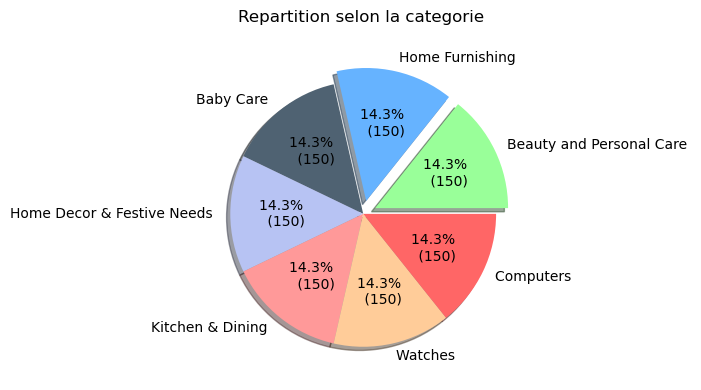

In [36]:
def percentFreq(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return '{:.1f}% \n ({v:d})'.format(pct, v=val)
    return my_format

def Camembert(data,col,  figsize=(10, 4),graphName=None, title=None):
    # df = data.dtypes.value_counts()
    # L=len(df)
    # labels=list(df.index)
    # sizes=list(df)
    
    df = data[col].value_counts().reset_index()

    L=len(set(data[col]))
    labels=list(set(df['index']))
    sizes=list(df[col])
    # print(labels,"\n",sizes)
    explode = Explodetuple(L)
    colors =AllColors[:L] 
    fig1, ax1 = plt.subplots(figsize=figsize)
    if title:
        plt.title(title) # , fontdict=font_title2
    _, _, text = ax1.pie(sizes, explode=explode, labels=labels, colors=colors, 
                         autopct=percentFreq(df[col]), shadow=True, startangle=0)
    # Ajustement de la taille des étiquettes
    for label in text:
        label.set_fontsize(10)
    # Equal aspect ratio ensures that pie is drawn as a circle
    #ax1.axis('equal')
    plt.tight_layout()
    if graphName:
        plt.savefig(imgPath+graphName, bbox_inches='tight')  
    # plt.show()
# '%1.1f%%'

Camembert(dfmarket,'category1', 
         title="Repartition selon la categorie \n")
to_png(fig_name='RepartCategory1')

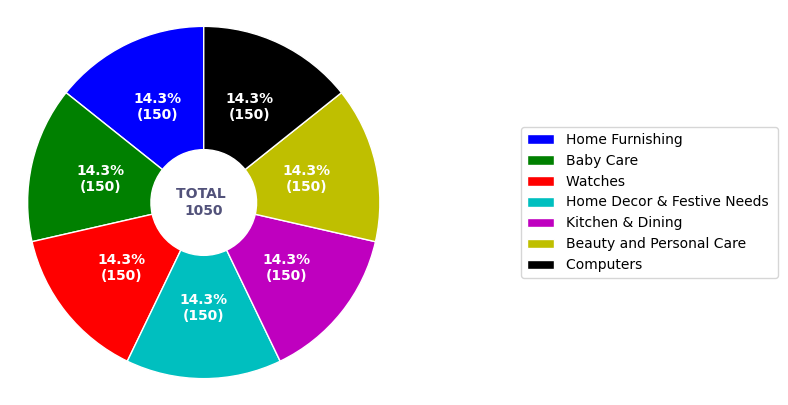

In [37]:
pie_chart(dfmarket, 'category1', detache=False,figsize=(5,5))

In [38]:
freqSimple2(dfmarket,['category1', 'category3','category3'])

------------------------------------

#### Fréquence sur la variable ***category1***

------------------------------------

category1  Nombre  Frequence  Freq. cumul
0             Home Furnishing      150   0.142857     0.142857
1                   Baby Care      150   0.142857     0.285714
2                     Watches      150   0.142857     0.428571
3  Home Decor & Festive Needs      150   0.142857     0.571429
4            Kitchen & Dining      150   0.142857     0.714286
5    Beauty and Personal Care      150   0.142857     0.857143
6                   Computers      150   0.142857     1.000000

------------------------------------

#### Fréquence sur la variable ***category3***

------------------------------------

category3  Nombre  Frequence  Freq. cumul
0                           Deodorants       65   0.061905     0.061905
1             Blankets, Quilts & Dohars      56   0.053333     0.115238
2                  Baby Girls' Clothes       49   0.046667     0.161905
3                              Routers       49   0.046667     0.208571
4                          USB Gadgets       38   0.036190     0.244762
..                                  ...     ...        ...          ...
241                  Strollers & Prams        1   0.000952     0.993333
242   Srushti Art Jewelry Wrist Watches       1   0.000952     0.994286
243                   Table Linen Sets        1   0.000952     0.995238
244                 Baby Sleeping Bags        1   0.000952     0.996190
245                 Titan Wrist Watches       1   0.000952     0.997143

[246 rows x 4 columns]

------------------------------------

#### Fréquence sur la variable ***category3***

------------------------------------

category3  Nombre  Frequence  Freq. cumul
0                           Deodorants       65   0.061905     0.061905
1             Blankets, Quilts & Dohars      56   0.053333     0.115238
2                  Baby Girls' Clothes       49   0.046667     0.161905
3                              Routers       49   0.046667     0.208571
4                          USB Gadgets       38   0.036190     0.244762
..                                  ...     ...        ...          ...
241                  Strollers & Prams        1   0.000952     0.993333
242   Srushti Art Jewelry Wrist Watches       1   0.000952     0.994286
243                   Table Linen Sets        1   0.000952     0.995238
244                 Baby Sleeping Bags        1   0.000952     0.996190
245                 Titan Wrist Watches       1   0.000952     0.997143

[246 rows x 4 columns]

----
Nous allons utiliser la variable **category1** comme notre target dans cette analyse. Il s'agit des sept (07) groupes de produits.
Donc, nous allons l'encoder. 

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfmarket['cat_code'] = le.fit_transform(np.array(dfmarket['category1']))

label = list(set(dfmarket['cat_code'].values)) 
for i in range(len(label)):
    df = dfmarket.loc[dfmarket['cat_code'] == i]
    cat = df['category1'].iloc[0]
    print('Le label {} correspond à la catégorie {}' .format(i, cat))

Le label 0 correspond à la catégorie Baby Care 
Le label 1 correspond à la catégorie Beauty and Personal Care 
Le label 2 correspond à la catégorie Computers 
Le label 3 correspond à la catégorie Home Decor & Festive Needs 
Le label 4 correspond à la catégorie Home Furnishing 
Le label 5 correspond à la catégorie Kitchen & Dining 
Le label 6 correspond à la catégorie Watches 


In [40]:
le.inverse_transform([0,6])

array(['Baby Care ', 'Watches '], dtype=object)

In [41]:
dico={i:cat for i, cat in enumerate(sorted(list(set(dfmarket['category1'].values))))}
dico

{0: 'Baby Care ',
 1: 'Beauty and Personal Care ',
 2: 'Computers ',
 3: 'Home Decor & Festive Needs ',
 4: 'Home Furnishing ',
 5: 'Kitchen & Dining ',
 6: 'Watches '}

In [42]:
dico[3]

'Home Decor & Festive Needs '

#### <font color="#337da4" id="2.5.2"> 2.5.2. Description du produit  </font>
----------------------------

In [43]:
# Convertir en minuscules
dfmarket["_description"] = dfmarket['description'].apply(lambda x: x.lower())
dfmarket[['description','_description']].head()

description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        _description  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel (...  
2  key features of eurospa cotton terry face towe...  
3  key features of santosh royal fashion cotton p...  
4  key features of jaipur print cotton floral kin...

In [44]:
# Punctuation removal function
import re
def remove_punctuation(text):
    ''' supprime les ponctuations'''
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    #return text.translate(str.maketrans('', '', string.punctuation))

In [45]:
dfmarket["_description"] = dfmarket["_description"].apply(lambda x: remove_punctuation(x))
dfmarket[['description','_description']].head()

description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        _description  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel 3...  
2  key features of eurospa cotton terry face towe...  
3  key features of santosh royal fashion cotton p...  
4  key features of jaipur print cotton floral kin...

In [46]:
dfmarket[['product_name',  'image']]

product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                     image  
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1     7b72c92c2f6c40268628ec5f14c6d590.jpg  
2     64d5d4a258243731dc7bbb1eef49ad74.jpg  
3     d4684dcdc759dd9cdf41504698d737d8.jpg  
4     6325b6870c54cd47be6ebfbffa620ec7.jpg  
...                                    ...  
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg  
1046  fd6cbcc22efb6b761bd564c28928483c.jpg  
1047  5912e037d12774bb73a2048f35a00009.jpg  
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg  
1049  f2f027ad6a6df617c9f125173da71e44.jpg  

[1050 rows x 2 columns]

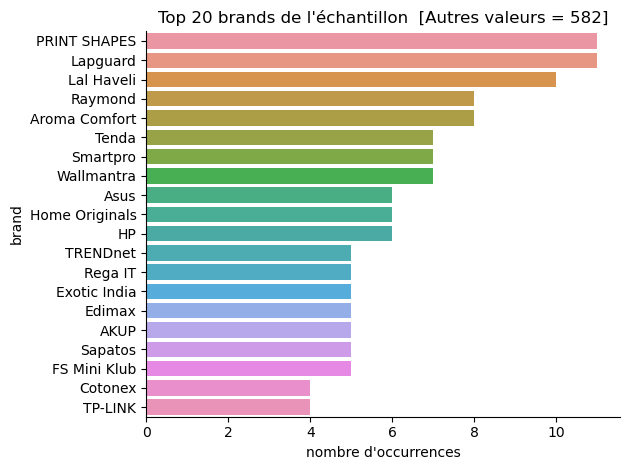

In [47]:
plot_mostFreqTags(dfmarket, 'brand', nb=20,
               soustitre="Top 20 brands de l'échantillon")

#### <font color="#337da4" id="2.5.3"> 2.5.3. Imputation  </font>
----------------------------

In [48]:
dfmarket['retail_price'].fillna((dfmarket['retail_price'].mean()), inplace=True)
dfmarket['discounted_price'].fillna((dfmarket['discounted_price'].mean()), inplace=True)

In [49]:
dfmarket['brand'].fillna('Inconnu', inplace=True)
dfmarket['product_specifications'].fillna('Inconnu', inplace=True)

In [50]:
dfmarket.isna().sum(axis=0)

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
category1                  0
category2                  0
category3                  3
cat_code                   0
_description               0
dtype: int64

-------
- Pour les variables **`prix`**, nous avons remplacé les valeurs manquantes par la moyenne.   
- Pour les variables **`brand`** et **`product_specifications`**, nous avons remplacé les valeurs manquantes par l'expression ***<< Inconnu >>***.

### <font color="#337da4" id="3">3. Exploration </font>
----------------------------

#### <font color="#337da4" id="3">Analyse target </font>
-----------
Nous allons nous interesser à la taille(longueur du texte) du champ description et sa distribution.

In [51]:
dfmarket.description.apply(lambda x: len(x))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: description, Length: 1050, dtype: int64

<Axes: >

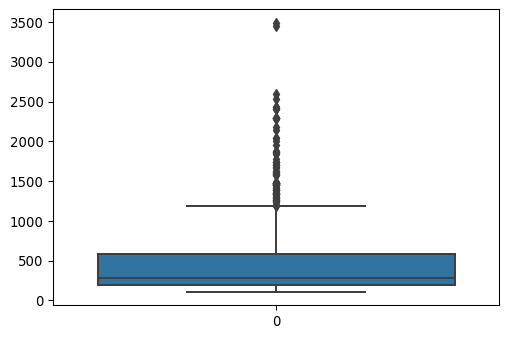

In [52]:
# import matplotlib as mpl

# sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_context('notebook')
# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

# mpl.rcParams["figure.figsize"] = (12, 4)
# plt.rcParams['figure.dpi'] = 96

tmp=dfmarket.description.str.len()
plt.figure(figsize=(6,4), dpi=96)
sns.boxplot(tmp)

<Figure size 768x288 with 0 Axes>

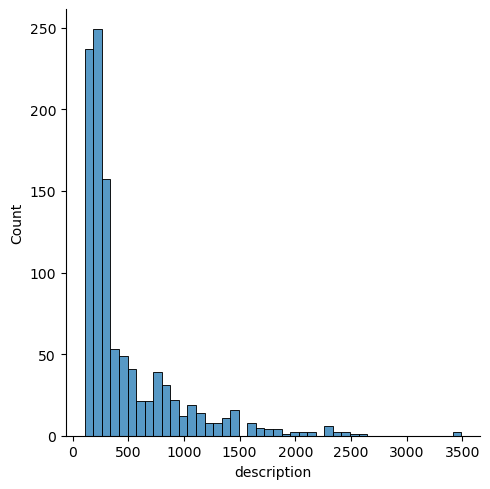

In [53]:
plt.figure(figsize=(8,3), dpi=96)
sns.displot(tmp)

----
Le graphique montre que la longueur de la description des produits tourne généralement entre **200** et **300** caractères. 

In [54]:
dfmarket['_len_description']=tmp
dfmarket.head(3)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   

   retail_price  discounted_price                                 image  \
0   1899.000000        899.000000  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1    600.000000        449.000000  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2   2186.197331       1584.527169  64d5d4a258243731dc7bbb1eef49ad74.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   
1  No rating available  No rating available  Sathiyas   
2  No rating available  No rating available   Eurospa   

                              product_specifications         category1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care    
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care    

                  category2           category3  cat_code  \
0   Curtains & Accessories            Curtains          4   
1         Baby Bath & Skin    Baby Bath Towels          0   
2         Baby Bath & Skin    Baby Bath Towels          0   

                                        _description  _len_description  
0  key features of elegance polyester multicolor ...              1420  
1  specifications of sathiyas cotton bath towel 3...               444  
2  key features of eurospa cotton terry face towe...              1258

#### Dates d'ajout des produits

"Distribution_des_dates_d'ajout.png"


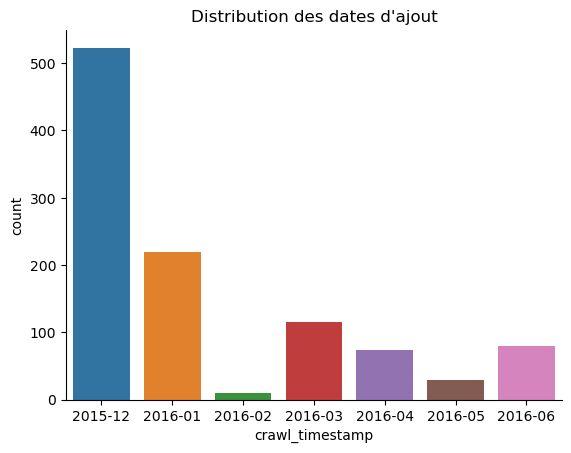

In [55]:
sns.countplot(x=pd.to_datetime(
    dfmarket['crawl_timestamp']).dt.strftime('%Y-%m').sort_values())
sns.despine()
plt.title('Distribution des dates d\'ajout')
to_png()

Les produits ont été ajoutés sur une période de sept(07) mois, de Décembre 2015 à Juin 2016.     
Le plus grand nombre d'ajout a été observé en Décembre.

### Variables numériques

In [56]:
print("Prix details uniques :", dfmarket['retail_price'].nunique())
print("Prix rabais uniques :", dfmarket['discounted_price'].nunique())

Prix details uniques : 355
Prix rabais uniques : 425


------------
- Plusieurs produits ont le meme prix de details.
- Plusieurs produits ont le meme prix rabais.

In [57]:
#  --------------------------------------------------------------------------
#     Plot histogramme
#  --------------------------------------------------------------------------
import scipy.stats as st
import matplotlib.pyplot as plt

def plot_histograms(df, features, bins=30, figsize=(12, 7), color='grey',
                    skip_outliers=False, thresh=3, layout=(3, 3), graphName=None):
    fig = plt.figure(figsize=figsize, dpi=96)

    for i, c in enumerate(features, 1):
        ax = fig.add_subplot(*layout, i)
        if skip_outliers:
            ser = df[c][np.abs(st.zscore(df[c])) < thresh]
        else:
            ser = df[c]
        ax.hist(ser, bins=bins, color=color)
        ax.set_title(c)
        ax.vlines(df[c].mean(), *ax.get_ylim(), color='red', ls='-', lw=1.5)
        ax.vlines(df[c].median(), *ax.get_ylim(), color='green', ls='-.', lw=1.5)
        ax.vlines(df[c].mode()[0], *ax.get_ylim(), color='goldenrod', ls='--', lw=1.5)
        ax.legend(['mean', 'median', 'mode'])
        # ax.title.set_fontweight('bold')
        # xmin, xmax = ax.get_xlim()
        # ax.set(xlim=(0, xmax/5))

    plt.tight_layout(w_pad=0.5, h_pad=0.65)
    if graphName:
        plt.savefig(imgPath + graphName, bbox_inches='tight', dpi=96)
    # plt.show()
    return fig

In [58]:
def searchfeature(data, suffix):
    varlist = [col for col in data.columns if suffix in col]
    return varlist

def select_features_types(data, types:list):
    return data.select_dtypes(include=types).columns.tolist()

"distriPrix_WithOutliers.png"
"distriPrix_WithoutOutliers.png"


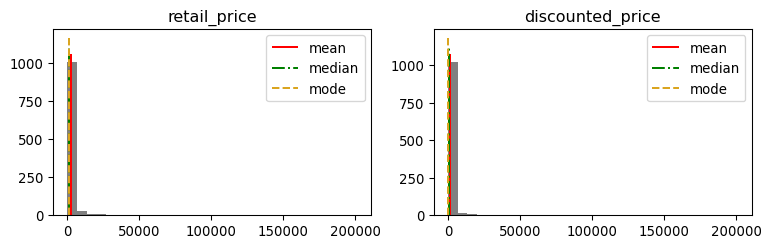

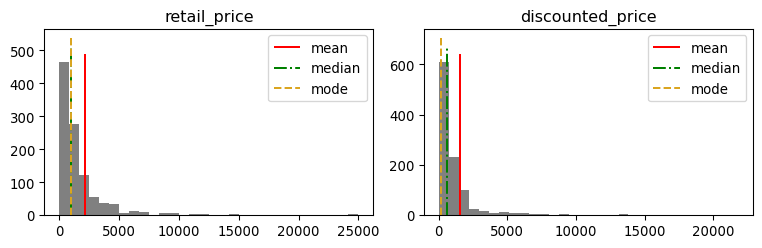

In [59]:
numeric_features=select_features_types(dfmarket, ['float'])
plot_histograms(dfmarket, numeric_features, bins=30, figsize=(12,7), color = 'grey',
                    skip_outliers=False, thresh=3, layout=(3,3), graphName=None)
to_png(fig_name='distriPrix_WithOutliers')
plot_histograms(dfmarket, numeric_features, bins=30, figsize=(12,7), color = 'grey',
                    skip_outliers=True, thresh=3, layout=(3,3), graphName=None)
to_png(fig_name='distriPrix_WithoutOutliers')

----------------
- Les distributions sont étalées à droite. 
- la majorité des produits coûtent moins chers. 

In [60]:
from scipy.stats import variation
from scipy import stats
def description_var(data):
    df = data.select_dtypes(include='number')
    for col in df:
        colData = df[col]
        mean = np.mean(colData)
        median = np.median(colData)
        Q1 = np.percentile(colData, 25)
        Q3 = np.percentile(colData, 75)
        max = colData.max()
        min = colData.min()
        variance = np.var(colData)
        standard_deviation = np.std(colData)
        skew = pd.DataFrame(colData).skew()[0]
        kurt = pd.DataFrame(colData).kurtosis()[0]
        print("Statistiques sur la variable {} \n" .format(col))
        print("La moyenne {} est : {}".format(col, round(mean, 2)))
        print("La médiane {} est : {}".format(col, round(median, 2)))
        print("Quartile Q1 est : {} ".format(round(Q1, 2)))
        print("Quartile Q3 est : : {} ".format(round(Q3, 2)))
        print("Le maximum est : {} ".format(max))
        print("Le minimum est : {} \n \n".format(min))
        display(df[col].describe().reset_index().round(0))
        print("\n \n")


In [61]:
description_var(dfmarket)

Statistiques sur la variable retail_price 

La moyenne retail_price est : 2186.2
La médiane retail_price est : 999.0
Quartile Q1 est : 555.75 
Quartile Q3 est : : 1999.0 
Le maximum est : 201000.0 
Le minimum est : 35.0 
 



index  retail_price
0  count        1050.0
1   mean        2186.0
2    std        7636.0
3    min          35.0
4    25%         556.0
5    50%         999.0
6    75%        1999.0
7    max      201000.0


 

Statistiques sur la variable discounted_price 

La moyenne discounted_price est : 1584.53
La médiane discounted_price est : 600.0
Quartile Q1 est : 340.0 
Quartile Q3 est : : 1199.75 
Le maximum est : 201000.0 
Le minimum est : 35.0 
 



index  discounted_price
0  count            1050.0
1   mean            1585.0
2    std            7472.0
3    min              35.0
4    25%             340.0
5    50%             600.0
6    75%            1200.0
7    max          201000.0


 

Statistiques sur la variable cat_code 

La moyenne cat_code est : 3.0
La médiane cat_code est : 3.0
Quartile Q1 est : 1.0 
Quartile Q3 est : : 5.0 
Le maximum est : 6 
Le minimum est : 0 
 



index  cat_code
0  count    1050.0
1   mean       3.0
2    std       2.0
3    min       0.0
4    25%       1.0
5    50%       3.0
6    75%       5.0
7    max       6.0


 

Statistiques sur la variable _len_description 

La moyenne _len_description est : 473.82
La médiane _len_description est : 278.0
Quartile Q1 est : 192.0 
Quartile Q3 est : : 588.25 
Le maximum est : 3490 
Le minimum est : 109 
 



index  _len_description
0  count            1050.0
1   mean             474.0
2    std             458.0
3    min             109.0
4    25%             192.0
5    50%             278.0
6    75%             588.0
7    max            3490.0

In [62]:
dfmarket.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
category1                   object
category2                   object
category3                   object
cat_code                     int32
_description                object
_len_description             int64
dtype: object

#### <font color="#337da4"> Variables nominales </font>
----------------------------

In [63]:

#  --------------------------------------------------------------------------
#  Graphique Count (multi-graphe) sur plusieurs variables.
#  --------------------------------------------------------------------------


def numberBycategory(data, x, axis, title, labelsize, rotation, ylabsize, saturation, palette):
    g = sns.countplot(x=x, data=data, saturation=saturation, ax=axis, palette=palette)
    for i, label1 in enumerate(axis.containers):
        axis.bar_label(label1, label_type='edge', fontsize=labelsize)
    for tick in axis.get_xticklabels():
        tick.set_rotation(rotation)
    # plt.xlabel(xtitle, color='black')

    # plt.ylabel(ytitle, color='black')
    # ax.tick_params(axis='x', colors='black')
    # g.set_xticks([])
    g.set_xlabel('')
    g.set_ylabel('Nombre', size=ylabsize)
    # ax.title.set_text(title, fontdict = {'font.size':10})
    g.set_title(title, fontdict=font_title3)
    return g


def g_multi_count(data, listvar, title, ncols=2, figsize=(12, 5), labelsize=8, rotation=0,
                  ylabsize=8, saturation=1, palette='Set3', graphName=''):
    nplot = len(listvar)
    nrows = nplot // ncols + 1
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,  # sharey=True,  sharex=True,
                            constrained_layout=True, squeeze=False, figsize=figsize)
    axs = trim_axs(axs, nplot)
    for ax, var in zip(axs, listvar):
        numberBycategory(data, var, ax, var, labelsize, rotation, ylabsize, saturation, palette)
    fig.text(0.5, 0.90, title, ha="center", fontdict=font_title)
    if graphName != '':
        fig.savefig(imgPath + graphName, bbox_inches='tight')
    # fig.subplots_adjust(top=0.88)
    # fig.tight_layout()
    plt.show()


#  --------------------------------------------------------------------------
#  Graphique avec une aggreg function  (multi-graphe) sur plusieurs variables.
#  --------------------------------------------------------------------------


def aggBycategory(data, x, y: float, agg_func, axis, title, labelsize, rotation,
                  xlabsize, ylabsize, palette, saturation):
    dftemp = (data.groupby(x).agg({y: agg_func}).reset_index().round(0))
    g = sns.barplot(x=x, y=y, data=dftemp, saturation=saturation, ax=axis, palette=palette)
    for label1 in axis.containers:
        axis.bar_label(label1, label_type='edge', fontsize=labelsize)  # color= AllColors[i],
    for tick in axis.get_xticklabels():
        tick.set_rotation(rotation)
    # plt.xlabel(xtitle, color='black')
    # plt.ylabel(ytitle, color='black')
    axis.tick_params(axis='x', colors='black')
    axis.tick_params(axis='y', colors='black')
    for tick in axis.xaxis.get_major_ticks():
        tick.label.set_fontsize(xlabsize)

    for tick in axis.yaxis.get_major_ticks():
        tick.label.set_fontsize(ylabsize)

    # axes.legend(prop=dict(size=10))
    #    axis.yaxis.set_tick_params(labelsize=ylabsize)
    # g.set_xticks([])
    g.set_xlabel('', size=xlabsize)
    g.set_ylabel(agg_func + ' of ' + y, size=ylabsize)
    # ax.title.set_text(title, fontdict = {'font.size':10})
    g.set_title(title + "\n", fontdict=font_title3)
    return g


#  --------------------------------------------------------------------------
# muted, pastel, coolwarm,'Accent', 'cubehelix',
# 'gist_rainbow', 'terrain', 'viridis', vlag
#  --------------------------------------------------------------------------

def g_multi_agg(data, listvar, aggvar, agg_func, title, ncols=2, figsize=(12, 5), labelsize=8,
                rotation=0, xlabsize=8, ylabsize=8, palette='coolwarm', saturation=0.85, graphName='',
                shareyy: bool = True, sharexx: bool = False):
    nplot = len(listvar)
    nrows = nplot // ncols + 1
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharey=shareyy, sharex=sharexx,
                            constrained_layout=True, squeeze=False, figsize=figsize)
    axs = trim_axs(axs, nplot)
    for ax, var in zip(axs, listvar):
        aggBycategory(data, var, aggvar, agg_func, ax, var, labelsize,
                      rotation, xlabsize, ylabsize, palette, saturation)
    fig.text(0.5, 0.90, title, ha="center", fontdict=font_title2)
    if graphName != '':
        fig.savefig(imgPath + graphName, bbox_inches='tight')
    # fig.subplots_adjust(top=0.88)
    # fig.tight_layout()
    plt.show()


#  --------------------------------------------------------------------------
#     Function countplot de seaborn
#  --------------------------------------------------------------------------

def countplot2(data, x, title, xtitle, ytitle, figsize=(10, 3),
               labelsize=8, rotation=20, graphName: str = None, style='fast'):
    plt.style.use(style)  # 'fivethirtyeight', 'ggplot', 'bmh','seaborn-v0_8-whitegrid'
    fig = plt.figure(figsize=figsize)
    ax = sns.countplot(x=x, data=data, saturation=1)
    for i, label1 in enumerate(ax.containers):
        ax.bar_label(label1, label_type='edge', fontsize=labelsize)  # color= AllColors[i],
    for tick in ax.get_xticklabels():
        tick.set_rotation(rotation)
    plt.xlabel(xtitle, color='black')
    plt.ylabel(ytitle, color='black')
    ax.tick_params(axis='x', colors='black')
    fig.text(0.5, 0.90, title, ha="center", fontdict=font_title2)
    # plt.tight_layout()
    if graphName:
        plt.savefig(imgPath + graphName, bbox_inches='tight')
    plt.show()


#  --------------------------------------------------------------------------
#     Fonction barplot de seaborn
#  --------------------------------------------------------------------------


def barplot2(data, x, y, title, xtitle, ytitle, agg_func, figsize=(10, 3),
             labelsize=8, rotation=20, graphName: str = None, style='ggplot', palette='muted'):
    dftemp = (data.groupby(x).agg({y: agg_func}).reset_index())
    dftemp = dftemp.sort_values(by=[y], ascending=False)
    plt.style.use(style)  # 'fivethirtyeight', 'ggplot', 'bmh','seaborn-v0_8-whitegrid'
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=dftemp, palette=palette)  # muted, pastel,coolwarm,'Accent','cubehelix',
    # 'gist_rainbow', 'terrain', 'viridis',vlag
    for i, label1 in enumerate(ax.containers):
        ax.bar_label(label1, label_type='edge', fontsize=labelsize)  # color= AllColors[i],
    for tick in ax.get_xticklabels():
        tick.set_rotation(rotation)

    plt.xlabel(xtitle, color='black')
    plt.ylabel(ytitle, color='black')
    # plt.title(title )
    ax.tick_params(axis='x', colors='black')
    fig.text(0.5, 0.90, title, ha="center", fontdict=font_title2)
    # plt.tight_layout()
    if graphName:
        plt.savefig(imgPath + graphName, bbox_inches='tight')
    plt.show()


def barplot3(pd_df, varX, varY, agg_func, title, xrotation=0, labrotation=45,
             barlabsize=8, labcolor='m', figsize=(10, 3), graphName: str = None):
    fig = plt.figure(figsize=figsize)
    pd_df = (pd_df.groupby(varX).agg({varY: agg_func}).reset_index().round(0).sort_values(by=[varX]))
    g = sns.barplot(x=varX, y=varY, data=pd_df)
    g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    g.set(xlabel=varX, ylabel=varY)
    # x labels
    g.set_xticklabels(pd_df[varX])
    for item in g.get_xticklabels():
        item.set_rotation(xrotation)
    # bar label orientation
    for i, v in enumerate(pd_df[varY].items()):
        g.text(i, v[1], "{:}".format(v[1]), color=labcolor, va='bottom',
               rotation=labrotation, size=barlabsize)

    fig.text(0.5, 0.90, title, ha="center", fontdict=font_title2)
    plt.tight_layout()
    if graphName:
        fig.savefig(imgPath + graphName, bbox_inches='tight')
    plt.show()


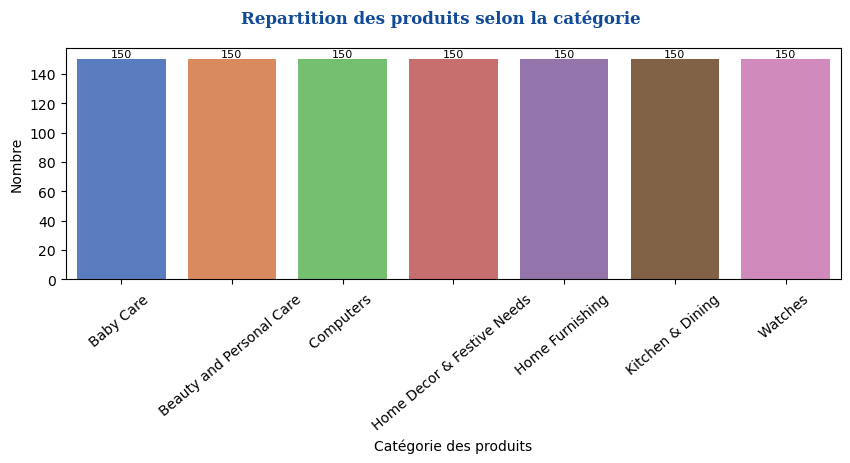

In [64]:
barplot2(dfmarket, 'category1', 'uniq_id',
         agg_func='nunique',
         title=r"Repartition des produits selon la catégorie" "\n",
         xtitle='Catégorie des produits', ytitle='Nombre', 
         figsize=(10,3), labelsize=8, rotation=40, 
         graphName = 'repartbycategory1.png', style='fast')

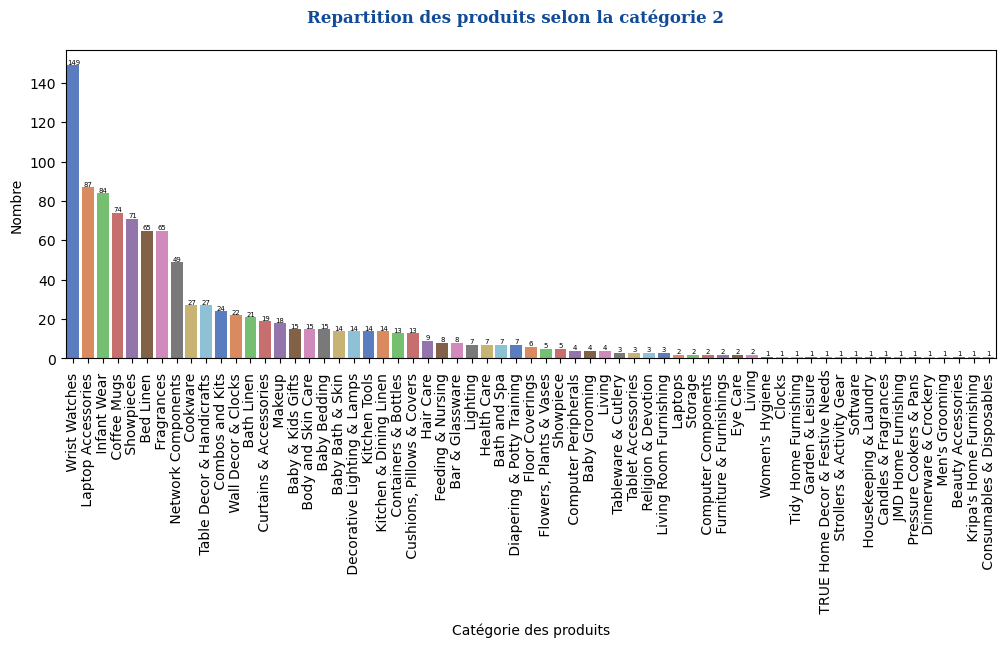

In [65]:
barplot2(dfmarket, 'category2', 'uniq_id',
         agg_func='nunique',
         title=r"Repartition des produits selon la catégorie 2" "\n",
         xtitle='Catégorie des produits', ytitle='Nombre', 
         figsize=(12,4), labelsize=5, rotation=90, 
         graphName = 'repartbycategory2.png', style='fast')

In [66]:

def nuagedemots(data, col, figsize=(16, 12), color="white", graphName: str = None):
    """
    Cette fonction retourne un graphique de nuage de mots.
    :param data: le dataframe en entree.
    :param col: La colonne contenant les données nominales
    :return: Graphique nuage de mots
    """
    display(Markdown('------------------------------------'))
    display(Markdown('#### Nuage de mots sur : {0}'.format(col)))
    print('Nombre de modalités uniques :', data[col].nunique())
    display(Markdown('------------------------------------'))
    fig = plt.figure(1, figsize=figsize)
    ax1 = fig.add_subplot(1, 1, 1)
    # Creation de la variable text
    df = data.loc[data[col].notnull(), :]
    text = ' '.join(cat for cat in df[col])
    # Carte avec les mots: background_color="salmon"
    word_cloud = WordCloud(width=2000, height=1000, normalize_plurals=False, random_state=1,  # colormap="Pastel1",
                           collocations=False, stopwords=STOPWORDS, background_color=color, ).generate(text)
    ax1.imshow(word_cloud, interpolation="bilinear")
    # Afficher le nuage
    plt.imshow(word_cloud)
    plt.axis("off")
    if graphName:
        plt.savefig(imgPath + graphName, bbox_inches='tight')
    #plt.show()
    # plt.close()

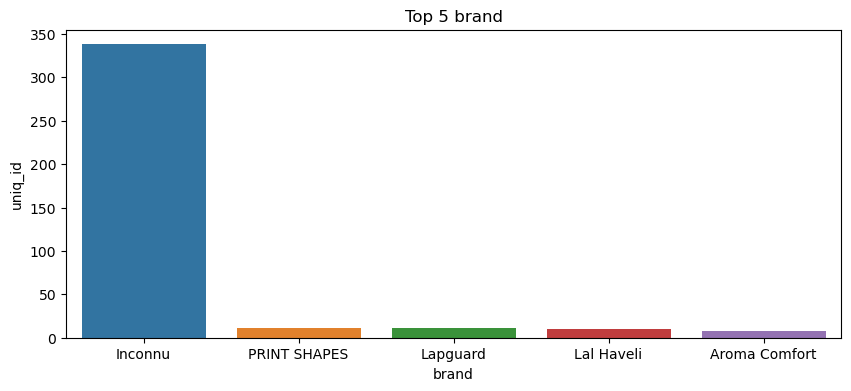

In [67]:
product_by_brand = dfmarket[['uniq_id', 'brand']]\
    .groupby('brand').count().reset_index()
product_by_brand = product_by_brand.sort_values(by=['uniq_id'],
                                                ascending=False).head(5)
plt.figure(figsize=(10, 4))
sns.barplot(x='brand',
            y='uniq_id',
            data=product_by_brand)
plt.title("Top 5 brand")
plt.show()

------------------------------------

#### Nuage de mots sur : brand

Nombre de modalités uniques : 491


------------------------------------

"brandWordCloud.png"


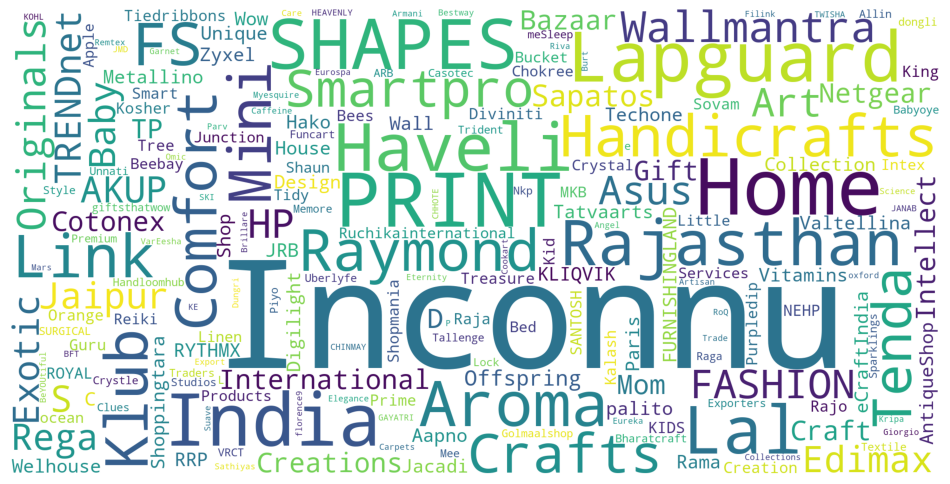

In [68]:
nuagedemots(dfmarket, 'brand', figsize=(12, 8), color="white")
to_png(fig_name='brandWordCloud')

------------------------------------

#### Nuage de mots sur : _description

Nombre de modalités uniques : 1050


------------------------------------

"descriptionWordCloud.png"


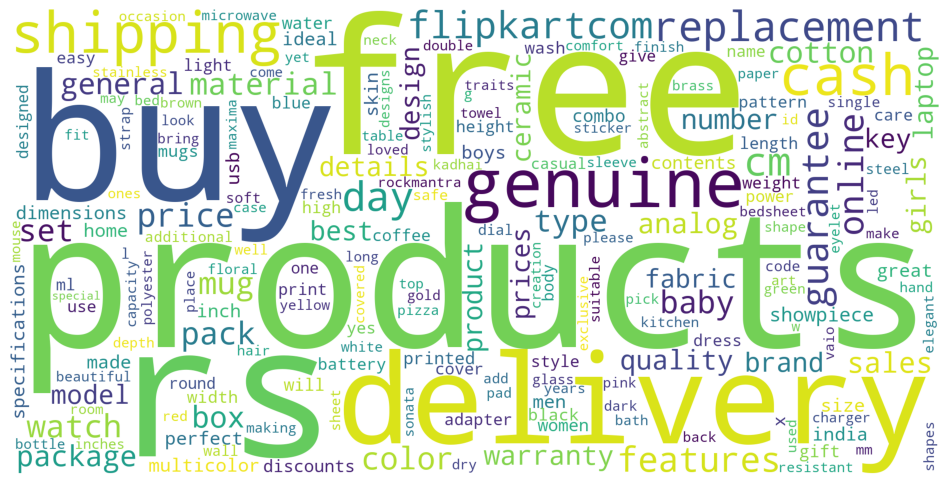

In [69]:
nuagedemots(dfmarket, '_description', figsize=(12, 8), color="white")
to_png(fig_name='descriptionWordCloud')

------------------------------------

#### Nuage de mots sur : product_name

Nombre de modalités uniques : 1050


------------------------------------

"productWordCloud.png"


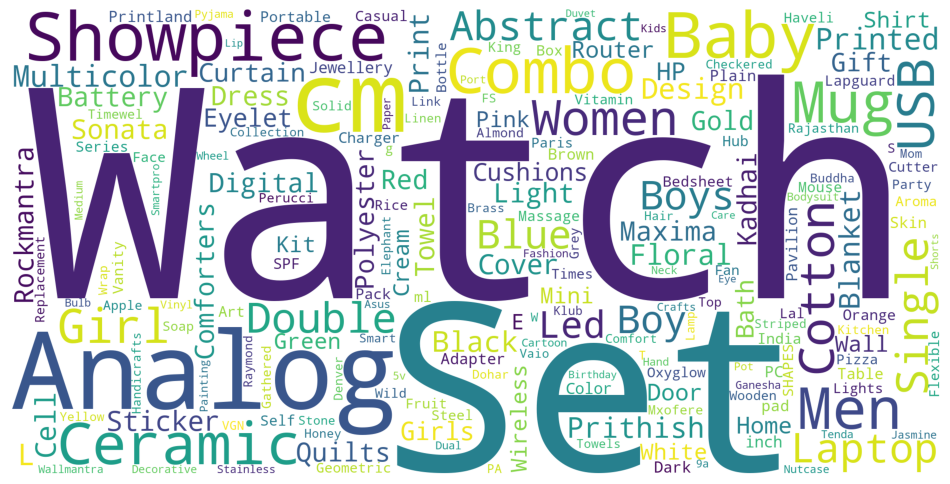

In [70]:
nuagedemots(dfmarket, 'product_name', figsize=(12, 8), color="white")
to_png(fig_name='productWordCloud')

#### <font color="#337da4"> Analyse multivariée </font>
----------------------------

In [71]:
dfmarket.corr()

retail_price  discounted_price  \
retail_price                 1.000000          0.990065   
discounted_price             0.990065          1.000000   
is_FK_Advantage_product      0.037862          0.046282   
cat_code                     0.037790          0.046290   
_len_description            -0.003231         -0.016037   

                         is_FK_Advantage_product  cat_code  _len_description  
retail_price                            0.037862  0.037790         -0.003231  
discounted_price                        0.046282  0.046290         -0.016037  
is_FK_Advantage_product                 1.000000  0.184944         -0.097106  
cat_code                                0.184944  1.000000         -0.020285  
_len_description                       -0.097106 -0.020285          1.000000

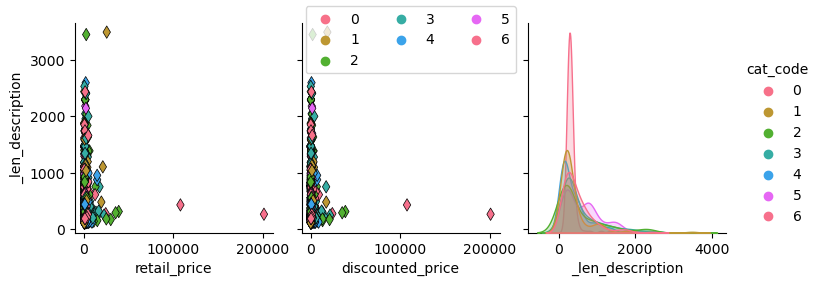

In [72]:
# plt.figure(figsize=(10, 4))
# g=sns.pairplot(dfmarket[['cat_code','_len_description']], hue='cat_code')
# g.fig.set_size_inches(8,5)
# plt.show()

# g = sns.pairplot(dfmarket[['cat_code','_len_description']], hue='cat_code', palette='husl', markers='d', size=2.5, plot_kws=
#     {
#     "s":40,
#     "alpha":1.0,
#     'lw':0.5,
#     'edgecolor':'k'
#     })
# g._legend.set_bbox_to_anchor((0.5, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(1.10, 1.0), ncol=1, fontsize="x-large") #vertical legend
# # plt.legend(loc='lower center', bbox_to_anchor=(0.0, -0.15), ncol=3, fontsize="x-large") #horizontal legend bottom
# # plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.15), ncol=3, fontsize="x-large") #horizontal legend top
# # g.savefig('Test.png', bbox_inches='tight')

g = sns.pairplot(dfmarket[['retail_price', 'discounted_price','cat_code', '_len_description']], hue='cat_code', y_vars='_len_description', palette='husl', markers='d', size=2.5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=3)
# g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
# g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
g.fig.subplots_adjust(top=0.92, bottom=0.08)

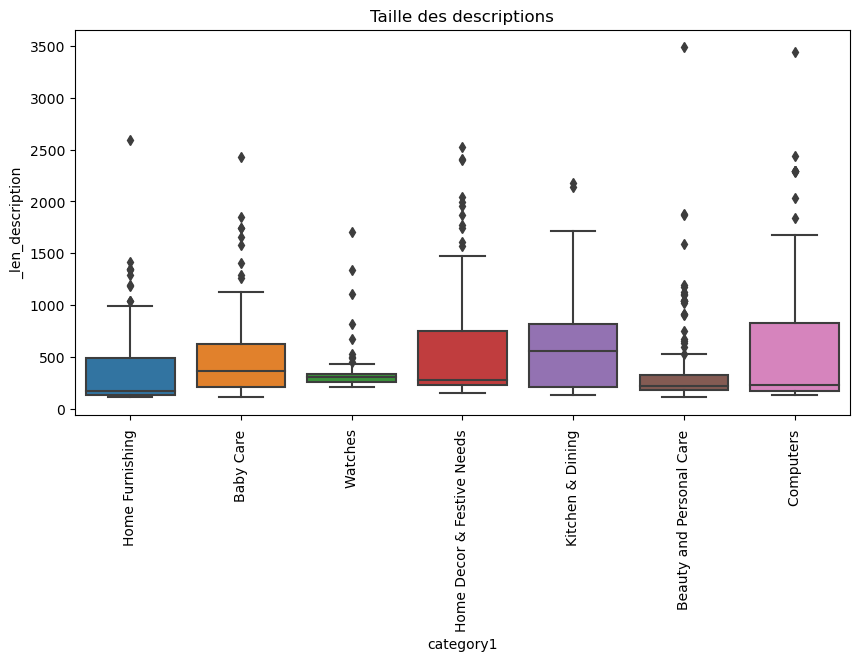

In [73]:
def bivariate(data,x, y, figsize=(10,5), rotation=90, title=None):
    fig = plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, x=x, y=y)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.title("Taille des descriptions")
    plt.show()

bivariate(dfmarket,'category1', '_len_description', figsize=(10,5),
         title="Taille des descriptions selon la catégorie")

In [74]:
from pingouin import kruskal
aov=kruskal(data=dfmarket, dv='_len_description', between='category1')
aov

Source  ddof1          H         p-unc
Kruskal  category1      6  76.194503  2.178313e-14

In [75]:
import scikit_posthocs as sp
aovPost=sp.posthoc_dunn(dfmarket, '_len_description', 'category1', 'bonferroni')
aovPost.round(2).reset_index()
aovPost.style.applymap(lambda x: 'background-color : green' if x<0.05 else '')

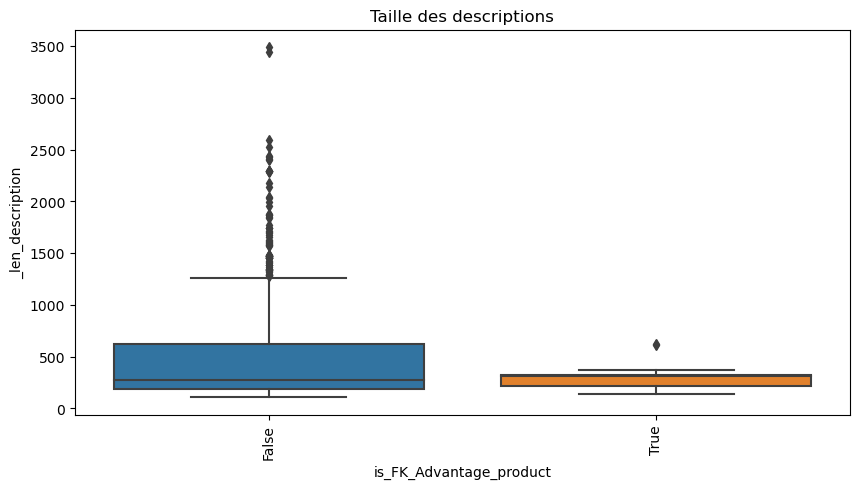

In [76]:
bivariate(dfmarket,x='is_FK_Advantage_product', y='_len_description',  figsize=(10,5),
         title="Taille des descriptions selon is_FK_Advantage_product")

### <font color="#337da4" id="4">4. Données Textuelles </font>
----------------------------

Le **[NLP](https://datascientest.com/introduction-au-nlp-natural-language-processing)** pour ***Natural Language Processing*** ou ***Traitement du Langage Naturel*** est une discipline qui porte essentiellement sur la compréhension, la manipulation et la génération du langage naturel par les machines.  Ainsi, le NLP est réellement à l'interface entre la science informatique et la linguistique. Il porte donc sur la capacité de la machine à interagir directement avec l'humain.



#### <font color="#337da4" id="4.1">4.1 Prétraitement des données ou preprocessing</font>
---------------------------
Afin d'utiliser de disposer de **données utilisatbles** par les modèles de **machine learning**, il est indispensable de transformer les données brutes en des données exploitables. Dans la plupart des cas, le preprocessing consiste à enlever les caractères qui ne sont pas des lettres comme « # », « -« , « ! », les chiffres ou bien encore les mots qui n'ont pas de sens ou qui ne font pas partie de la langue analysée. 

Parmi les principales étapes du **Prétraitement**, on retrouve :

- ***Nettoyage*** : Variable selon la source des données, cette phase consiste à réaliser des tâches telles que la suppression d'urls, d'emoji, etc.

- ***Normalisation des données*** : <br>
    - **Tokenisation**, ou découpage du texte en plusieurs pièces appelés tokens. 
        Exemple : « Vous trouverez en pièce jointe le document en question » ; « Vous », « trouverez », « en pièce jointe », « le document », « en question ».<br>
    - **Stemming** : un même mot peut se retrouver sous différentes formes en fonction du genre (masculin féminin), du nombre (singulier, pluriel), la personne (moi, toi, eux…) etc. Le stemming désigne généralement le processus heuristique brut qui consiste à découper la fin des mots dans afin de ne conserver que la racine du mot.
        Exemple : « trouverez » -> « trouv »<br>
    - **Lemmatisation** : cela consiste à réaliser la même tâche mais en utilisant un vocabulaire et une analyse fine de la construction des mots. La lemmatisation permet donc de supprimer uniquement les terminaisons inflexibles et donc à isoler la forme canonique du mot, connue sous le nom de lemme. Exemple : « trouvez » -> trouver<br>
    - **Autres opérations** : suppression des chiffres, ponctuation, symboles et stopwords, passage en minuscule.
    - **N-grams**: Les n-grams sont tous simplement des suites de mots présents dans le texte. Ce que nous traitions jusqu'à présent étaient uniquement des unigrammes, nous pouvons ensuite rajouter des bigrammes ou même des trigrammes. Un bigramme est un couple de mot qui se suivent dans le texte, nous pouvons les trouver facilement grâce à NLTK   

##### <font color="#337da4" > Mise en place des stopwords</font>
---------

Nous utiliserons la librairie nltk (Natural Language Toolkit), pour aider le nettoyage. <br>
Nous téléchargerons les stopwords, ponctuation et lemmatization.

In [77]:
stopW = stopwords.words('english')

# on récupère les stopword de nltk
import nltk
nltk.download('stopwords')
english_stopW = nltk.corpus.stopwords.words('english')
english_stopW = [l.lower() for l in list(english_stopW)]

# on récupère les stopword de WordCloud
from wordcloud import WordCloud, STOPWORDS
WordCloud_stopW = list(set(STOPWORDS))
WordCloud_stopW = [l.lower() for l in list(WordCloud_stopW)]

# on va rajouter la ponctuation au stopwords, on récupère les lettres isolées
import string
punctuation_stopW = list(string.ascii_lowercase)

all_stopwords = list(set(english_stopW + punctuation_stopW)) # + WordCloud_stopW 
stop_words=all_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fane0763\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


----------
Ici, nous allons afficher le nuage des mots des stopwords, juste pour avoir une idée.

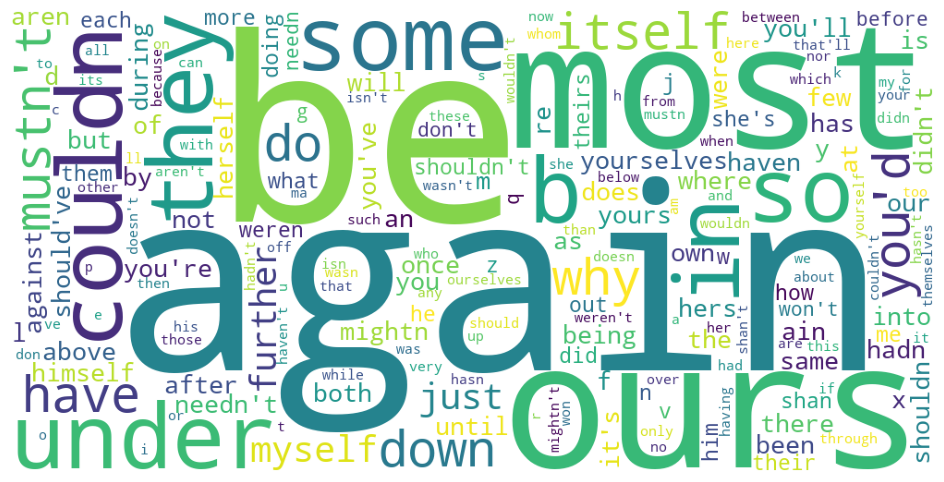

In [78]:
# WordCLoud d'une partie des Stopwords
from collections import Counter
word_could_dict = Counter(all_stopwords)
wordcloud = WordCloud(background_color='white', width=1000,
                      height=500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [79]:
def display_tokens_info(tokens):
    """Affiche les infos du corpus """    
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [80]:
# Corpus brut
raw_corpus = "".join(dfmarket.description.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [81]:
display_tokens_info(raw_corpus)

nb tokens 497512, nb tokens uniques 101
Key Features of Elegance Polye


In [82]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

eng_words = [i.lower() for i in words.words()]

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]


def stemmer_text(text):
    stemmer = SnowballStemmer("english")
    return [stemmer.stem(w) for w in text]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fane0763\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fane0763\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Fane0763\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [83]:
def clean_text(doc, rejoin=True,lemm_or_stemm="lem",list_rare_words=None, 
               stopWords=True, min_len_word=3, eng_words=None, extra_words=None,
              language='english',):
    
    # Suppression des stop_words
    if stopWords:
        stop_words = [l.lower() for l in list(nltk.corpus.stopwords.words(language))]
    else:
        stop_words=[]
        
    # list_unique_words
    if not list_rare_words:
        list_rare_words = []

    # extra_words
    if not extra_words:
        extra_words = []

    # lower and strip
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # drop rare tokens
    non_rare_tokens_list = [
        w for w in cleaned_tokens_list if w not in list_rare_words]

    # keep only len words > N
    more_than_N = [w for w in non_rare_tokens_list if len(w) >= min_len_word]

    # keep only alpha not num
    alpha_num = [w for w in more_than_N if w.isalpha()]

    # stem or lem
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num]

    # in english
    if eng_words:
        eng_words = [i.lower() for i in words.words()]
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text

    #############################################################
    #############################################################

    # drop extra_words tokens
    final = [w for w in engl_text if w not in extra_words]

    #############################################################
    #############################################################

    # return a list or a string
    if rejoin:
        return " ".join(final)

    return final

In [84]:
def final_clean(doc):
    new_doc=clean_text(doc, rejoin=True,lemm_or_stemm="lem",list_rare_words=None, stopWords=True, 
                       min_len_word=3, eng_words=None, extra_words=None, language='english',)
    return new_doc

In [85]:
import psutil
psutil.cpu_count(logical=False)

4

In [86]:
# from pandarallel import pandarallel
# pandarallel.initialize()
# dfmarket["clean_description_ws"] = dfmarket.description.parallel_apply(clean_text, stopWords=False)
dfmarket["clean_description_ws"] = dfmarket.description.apply(clean_text, stopWords=False)

In [87]:
# dfmarket["clean_description"] = dfmarket.description.parallel_apply(final_clean)
dfmarket["clean_description"] = dfmarket.description.apply(clean_text, stopWords=True)
# from joblib import Parallel, delayed
# dfmarket["clean_description"] = Parallel(n_jobs=-1)(delayed(final_clean)(desc) for desc in dfmarket["description"])

In [88]:
dfmarket.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0   1899.000000        899.000000  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1    600.000000        449.000000  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2   2186.197331       1584.527169  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3   2699.000000       1299.000000  d4684dcdc759dd9cdf41504698d737d8.jpg   
4   2599.000000        698.000000  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...                  brand  \
0  ...               Elegance   
1  ...               Sathiyas   
2  ...                Eurospa   
3  ...  SANTOSH ROYAL FASHION   
4  ...           Jaipur Print   

                              product_specifications         category1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care    
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care    
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing    

                  category2           category3 cat_code  \
0   Curtains & Accessories            Curtains         4   
1         Baby Bath & Skin    Baby Bath Towels         0   
2         Baby Bath & Skin    Baby Bath Towels         0   
3                Bed Linen           Bedsheets         4   
4                Bed Linen           Bedsheets         4   

                                        _description  _len_description  \
0  key features of elegance polyester multicolor ...              1420   
1  specifications of sathiyas cotton bath towel 3...               444   
2  key features of eurospa cotton terry face towe...              1258   
3  key features of santosh royal fashion cotton p...               858   
4  key features of jaipur print cotton floral kin...              1197   

                                clean_description_ws  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                   clean_description  
0  key feature elegance polyester multicolor abst...  
1  specificati

#### <font color="#337da4"> Export de la base nettoyée  </font>
----------------------------

**En Python**, la méthode **`pipe()`** est une fonction des objets **`DataFrame`** des bibliothèques **`pandas`** .   
Elle permet d'enchaîner des opérations de manière plus lisible et modulaire. 
La méthode **`pipe()`** prend le DataFrame en premier argument et le passe comme premier argument à la fonction func. Ensuite, elle transmet les arguments supplémentaires si spécifiés.

In [89]:
cols_to_keep=['product_name',  'image', 'description', 'cat_code','category1', 
              'clean_description', 'clean_description_ws', '_len_description']

def keep_columns(data, cols_to_keep:list):
    # return data.drop(columns=cols_to_drop)
    print(clr.start+f'Suppression de {len(list(set(data.columns.tolist())-set(cols_to_keep)))}  colonnes :.'+clr.end)
    print(clr.color+'*' * 30+clr.end)
    print()
    return data[cols_to_keep]

dfmarket = dfmarket.pipe(keep_columns, cols_to_keep)
dfmarket

Suppression de 14  colonnes :.
******************************



product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                     image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                            description  cat_code  \
0     Key Features of Elegance Polyester Multicolor ...         4   
1     Specifications of Sathiyas Cotton Bath Towel (...         0   
2     Key Features of Eurospa Cotton Terry Face Towe...         0   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...         4   
4     Key Features of Jaipur Print Cotton Floral Kin...         4   
...                                                 ...       ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...         0   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...         0   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...         0   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...         0   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...         0   

             category1                                  clean_description  \
0     Home Furnishing   key feature elegance polyester multicolor abst...   
1           Baby Care   specification sathiyas cotton bath towel bath ...   
2           Baby Care   key feature eurospa cotton terry face towel se...   
3     Home Furnishing   key feature santosh royal fashion cotton print...   
4     Home Furnishing   key feature jaipur print cotton floral king si...   
...                ...                                                ...   
1045        Baby Care   oren empower extra large self adhesive sticker...   
1046        Baby Care   wallmantra large vinyl sticker sticker pack pr...   
1047        Baby Care   buy uberlyfe extra large pigmented polyvinyl f...   
1048        Baby Care   buy wallmantra medium vinyl sticker sticker on...   
1049        Baby Care   buy uberlyfe large vinyl sticker online uberly...   

                                   clean_description_ws  _len_description  
0     key feature elegance polyester multicolor abst...              1420  
1     specification sathiyas cotton bath towel bath ...               444  
2     key feature eurospa cotton terry face towel se...              1258  
3     key feature santosh royal fashion cotton print...               858  
4     key feature jaipur print cotton floral king si...              1197  
...                                                 ...               ...  
1045  oren empower extra large self adhesive sticker...              2432  
1046  wallmantra large vinyl sticker sticker pack pr...              1660  
1047  buy uberlyfe extra large pigmented polyvinyl f...               262  
1048  buy wallmantra medium vinyl sticker sticker fo...               210  
1049  buy uberlyfe large vinyl sticker for online ub...               187  

[1050 rows x 8 columns]

In [90]:
# # dfmarket.columns
# cols_to_keep=['product_name',  'image', 'description', 'cat_code','category1', 'clean_description', '_len_description']
# dfmarket=dfmarket[cols_to_keep]
dfmarket.to_csv('dfcleaned.csv', index=False)

In [91]:
dfmarket=pd.read_csv('dfcleaned.csv')


#### <font color="#337da4" id="4.2">4.2 Approche Bag-of-words</font>
---------------------------

***Cette approche*** [Bag-of-words ou sac de mots](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a) donne le nombre d'occurences d'une liste de mots : à chaque fois que l'on croise ce mot, on le met dans le sac correspondant et on fait la somme du nombre de mots. la représentation est un vecteur de fréquence d'apparition des différents mots utilisés.

- **max_df** : fréquence maximale que doit avoir un mot, sinon si sa fréquence est supérieure, le mot n'est pas pris en compte.
- **min_df** : fréquence minimale que doit avoir un mot, sinon si sa fréquence est inférieure, le mot n'est pas pris en compte.
- **max_features** : nombre max de mots par sac de mots

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
import datetime, time
countvect = CountVectorizer(encoding='utf-8',
                                  strip_accents=None,
                                  lowercase=True,
                                  preprocessor=None,
                                  tokenizer=None,
                                  stop_words=stop_words,
                                  analyzer='word',
                                  max_df=0.95,
                                  min_df=0.01)

Les paramètres principaux à spécifier sont **max_df** et **min_df** qui correspondent respectivement à la fréquence maximale et minimale d'apparition du feature dans la totalité du texte. La fréquence maximale d'apparition est de 95% et la fréquence minimale d'apparition d'un mot dans le texte est de 1%.

In [93]:
def vectoriser_text(data:pd.DataFrame, vectoriser, text_col:str):
    '''
    :param data: Un dataframe
    :param vectoriser: la méthode d'extraction de features (vectorizer)
    :param text_col: la colonne contenant les textes à analyser
    :return: un dataframe, matrice dense
    '''
    matrix_v = vectoriser.fit_transform(data[text_col])
    count_tokens = vectoriser.get_feature_names_out()
    df_matrix = pd.DataFrame(data=matrix_v.toarray(),
                             index=data.index,
                             columns=count_tokens)
    print(clr.color+'*' * 39+clr.end)
    print(clr.start+f'Résultats : {type(vectoriser).__name__}:.'+clr.end)
    print(clr.color+'*' * 39+clr.end)
    print('Nombre de tokens :', len(count_tokens))
    print('Dimensions de la matrice :', matrix_v.shape)
    print(clr.color+'-' * 39+clr.end)
    print(' ''\n'' ')
    return df_matrix

In [94]:
# Méthode Bag of words
cv_bagofword=vectoriser_text(dfmarket, countvect,'clean_description')
cv_bagofword.head()

***************************************
Résultats : CountVectorizer:.
***************************************
Nombre de tokens : 485
Dimensions de la matrice : (1050, 485)
---------------------------------------
 
 


abstract  accessory  actual  adapter  add  additional  adorable  \
0         4          0       0        0    0           0         0   
1         0          0       0        0    0           0         0   
2         0          0       0        0    0           0         0   
3         0          0       0        0    0           0         0   
4         0          0       0        0    0           0         0   

   affordable  age  also  ...  woman  wood  wooden  work  world  would  year  \
0           0    0     0  ...      0     0       0     0      1      0     0   
1           0    0     0  ...      1     0       0     0      0      0     0   
2           0    0     0  ...      1     0       0     0      0      0     1   
3           0    0     0  ...      0     0       0     0      0      0     0   
4           0    0     0  ...      0     0       0     0      0      0     0   

   yellow  yes  yet  
0       0    0    0  
1       2    1    0  
2       0    0    0  
3       0    1    0  
4       0    1    0  

[5 rows x 485 columns]

In [95]:
y_true=dfmarket['category1']

Shape avant réduction :  (1050, 485)

Shape après réduction : (1050, 150)
Il faut 150 composantes pour expliquer 95% de la variance du dataset.

************************************************************************************************************************
Reduction : PCA, ARI :  0.067, time : 1.0
************************************************************************************************************************



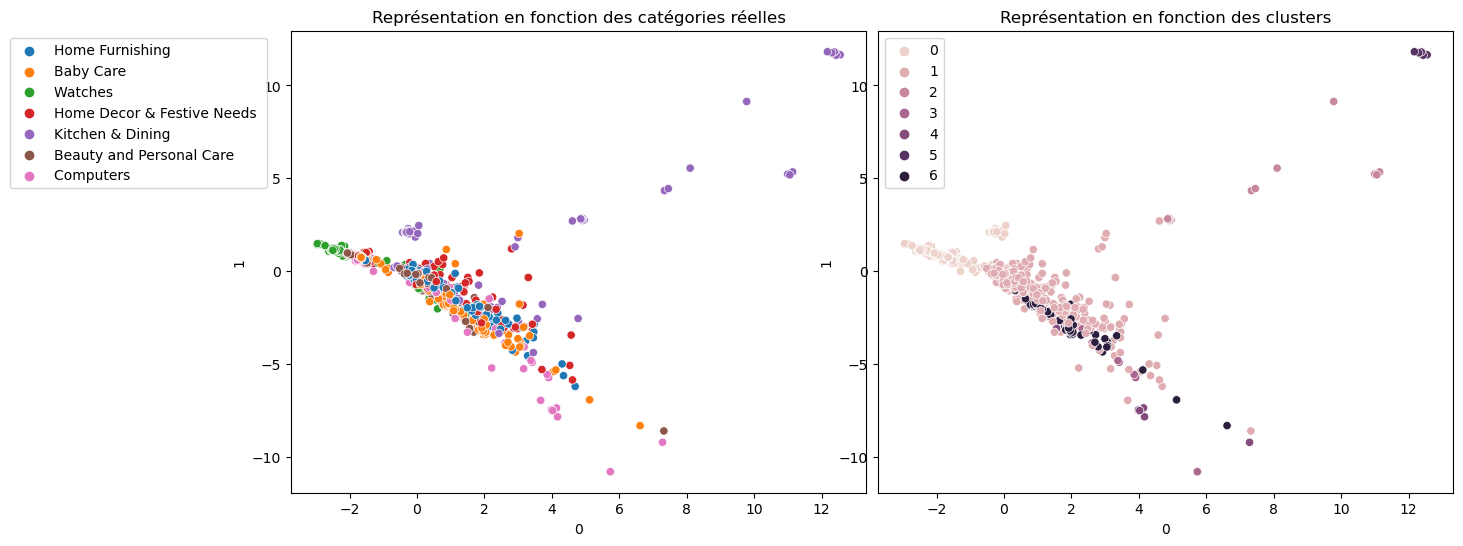

In [96]:
cv_bagofword_reduced, c = pca_data(cv_bagofword, scaler=StandardScaler(), n_comp=0.95)
y_pred, ARI=visu_categories(cv_bagofword_reduced, y_true, reduction='PCA', figsize=(15, 6))

************************************************************************************************************************
Reduction : TSNE, ARI :  0.3969, time : 8.0
************************************************************************************************************************



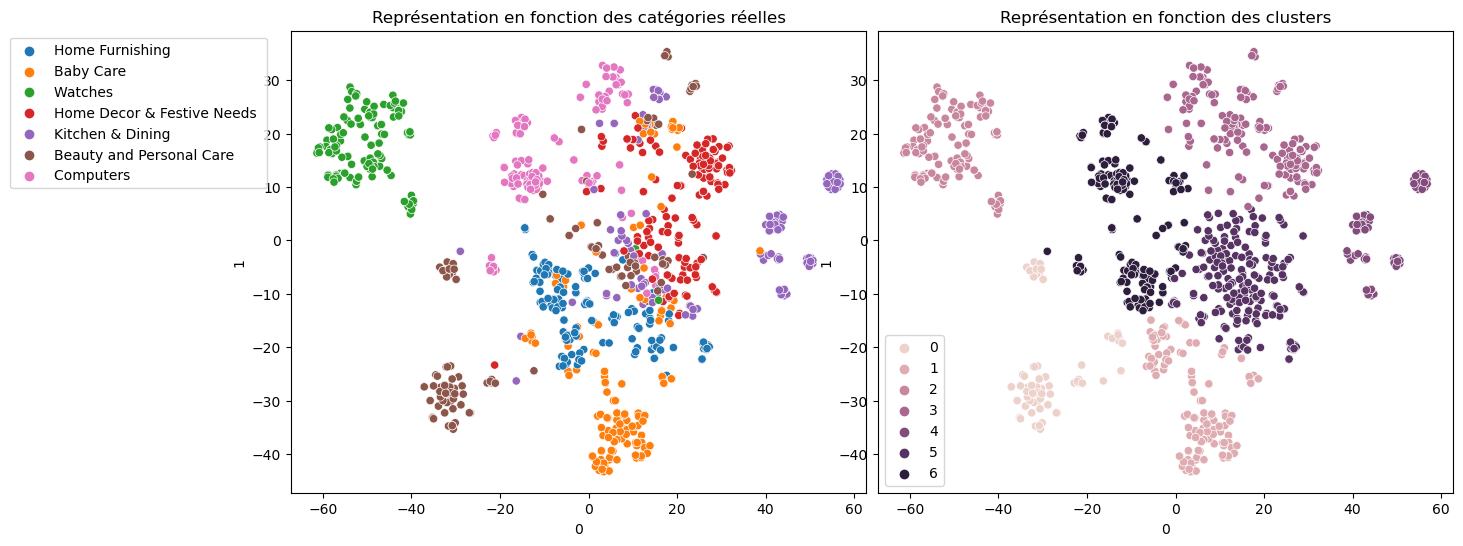

In [97]:
y_pred, ARI=visu_categories(cv_bagofword_reduced, y_true, reduction='TSNE', figsize=(15, 6))

In [98]:
# Creation d'une list pour stockage des resultats
dict_result = {}
dict_result.update({'Bag-of-Words' : [f'{ARI}']})
dict_result

{'Bag-of-Words': ['0.3969']}

#### Matrice de confusion

L'objectif de cette visualisation est de **mesurer la qualité** de notre système de classification et de pouvoir voir facilement quelle classe fuite vers une autre.

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, init='k-means++', random_state=random_state)
cls.fit(cv_bagofword)
labels_display=sorted(list(set(dfmarket["category1"])))
dfmarket["cluster"] = cls.labels_
conf_mat = confusion_matrix(dfmarket["cat_code"], dfmarket["cluster"])
print(conf_mat)


[[ 41  31   0   0   0   0  78]
 [108  40   0   0   2   0   0]
 [ 94  29   0  16  11   0   0]
 [ 87  63   0   0   0   0   0]
 [ 79  71   0   0   0   0   0]
 [ 56  42  31   0   0  21   0]
 [138  12   0   0   0   0   0]]


In [100]:
le.inverse_transform([0,6])
dico

{0: 'Baby Care ',
 1: 'Beauty and Personal Care ',
 2: 'Computers ',
 3: 'Home Decor & Festive Needs ',
 4: 'Home Furnishing ',
 5: 'Kitchen & Dining ',
 6: 'Watches '}

[[ 41  31   0   0   0   0  78]
 [108  40   0   0   2   0   0]
 [ 94  29   0  16  11   0   0]
 [ 87  63   0   0   0   0   0]
 [ 79  71   0   0   0   0   0]
 [ 56  42  31   0   0  21   0]
 [138  12   0   0   0   0   0]]
**************************************************
Correspondance calculée : [6 4 5 2 2 5 0]
Correspondance          : [6, 4, 5, 2, 1, 3, 0]

**************************************************
[[ 78   0   0   0  31   0  41]
 [  0   2   0   0  40   0 108]
 [  0  11  16   0  29   0  94]
 [  0   0   0   0  63   0  87]
 [  0   0   0   0  71   0  79]
 [  0   0   0  21  42  31  56]
 [  0   0   0   0  12   0 138]]
**************************************************
Métriques de performance par classe:.
**************************************************

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       150
           1       0.15      0.01      0.02       150
           2       1.00      0.11      0.19       150
           3 

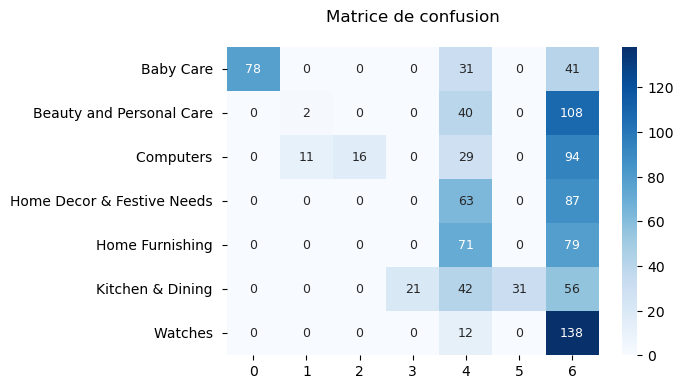

In [101]:
corresp=[6, 4, 5, 2, 1, 3, 0]
matrice_confusion(dfmarket,'category1',"cat_code", cv_bagofword, corresp=corresp)
to_png(fig_name='confusion_bow')

#### <font color="#337da4" id="4.3">4.3 Tf-idf (term frequency–inverse document frequency)</font>
---------------------------

L'approche tf-idf ***(term frequency–inverse document frequency)*** permet de calculer un score de proximité entre un terme de recherche et un document. <br>
**La partie tf** calcule une fonction croissante de la fréquence du terme de recherche dans le document étudié, **la partie idf** calcule une fonction inversement proportionnelle à la fréquence du terme dans l'ensemble des documents (ou corpus).<br>
**Le score total**, obtenu en multipliant les deux composantes, permet ainsi de donner un score d'autant plus élevé que le terme est surréprésenté.

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
# instantiate the vectorizer object
tfidfvectorizer = TfidfVectorizer(encoding='utf-8',
                                  strip_accents=None,
                                  lowercase=True,
                                  preprocessor=None,
                                  tokenizer=None,
                                  analyzer='word',
                                  stop_words=all_stopwords,
                                  max_df=0.95,
                                  min_df=0.01)

Les paramètres principaux à spécifier sont max_df et min_df qui correspondent respectivement à la fréquence maximale et minimale d'apparition du feature dans la totalité du texte. La fréquence maximale d'apparition est de 95% et la fréquence minimale d'apparition d'un mot dans le texte est de 1%.

In [104]:
# convert the dataframe's column into a matrix
tfidf_wm = tfidfvectorizer.fit_transform(
    dfmarket['clean_description'])

In [105]:
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
len(tfidf_tokens)

485

In [106]:
df_tfidfvect = pd.DataFrame(data=tfidf_wm.toarray(),
                            index=dfmarket.index,
                            columns=tfidf_tokens)
df_tfidfvect

abstract  accessory  actual  adapter  add  additional  adorable  \
0     0.202066        0.0     0.0      0.0  0.0         0.0       0.0   
1     0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
2     0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
3     0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
4     0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
...        ...        ...     ...      ...  ...         ...       ...   
1045  0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
1046  0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
1047  0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
1048  0.000000        0.0     0.0      0.0  0.0         0.0       0.0   
1049  0.000000        0.0     0.0      0.0  0.0         0.0       0.0   

      affordable  age     also  ...     woman  wood  wooden  work     world  \
0            0.0  0.0  0.00000  ...  0.000000   0.0     0.0   0.0  0.066603   
1            0.0  0.0  0.00000  ...  0.075945   0.0     0.0   0.0  0.000000   
2            0.0  0.0  0.00000  ...  0.043125   0.0     0.0   0.0  0.000000   
3            0.0  0.0  0.00000  ...  0.000000   0.0     0.0   0.0  0.000000   
4            0.0  0.0  0.00000  ...  0.000000   0.0     0.0   0.0  0.000000   
...          ...  ...      ...  ...       ...   ...     ...   ...       ...   
1045         0.0  0.0  0.00000  ...  0.000000   0.0     0.0   0.0  0.000000   
1046         0.0  0.0  0.09321  ...  0.000000   0.0     0.0   0.0  0.136999   
1047         0.0  0.0  0.00000  ...  0.000000   0.0     0.0   0.0  0.000000   
1048         0.0  0.0  0.00000  ...  0.000000   0.0     0.0   0.0  0.000000   
1049         0.0  0.0  0.00000  ...  0.000000   0.0     0.0   0.0  0.000000   

      would      year    yellow       yes  yet  
0       0.0  0.000000  0.000000  0.000000  0.0  
1       0.0  0.000000  0.198032  0.077601  0.0  
2       0.0  0.051187  0.000000  0.000000  0.0  
3       0.0  0.000000  0.000000  0.049471  0.0  
4       0.0  0.000000  0.000000  0.039691  0.0  
...     ...       ...       ...       ...  ...  
1045    0.0  0.000000  0.000000  0.000000  0.0  
1046    0.0  0.000000  0.000000  0.000000  0.0  
1047    0.0  0.000000  0.000000  0.000000  0.0  
1048    0.0  0.000000  0.000000  0.000000  0.0  
1049    0.0  0.000000  0.000000  0.000000  0.0  

[1050 rows x 485 columns]

Shape avant réduction :  (1050, 485)

Shape après réduction : (1050, 205)
Il faut 205 composantes pour expliquer 95% de la variance du dataset.

************************************************************************************************************************
Reduction : PCA, ARI :  0.2806, time : 1.0
************************************************************************************************************************



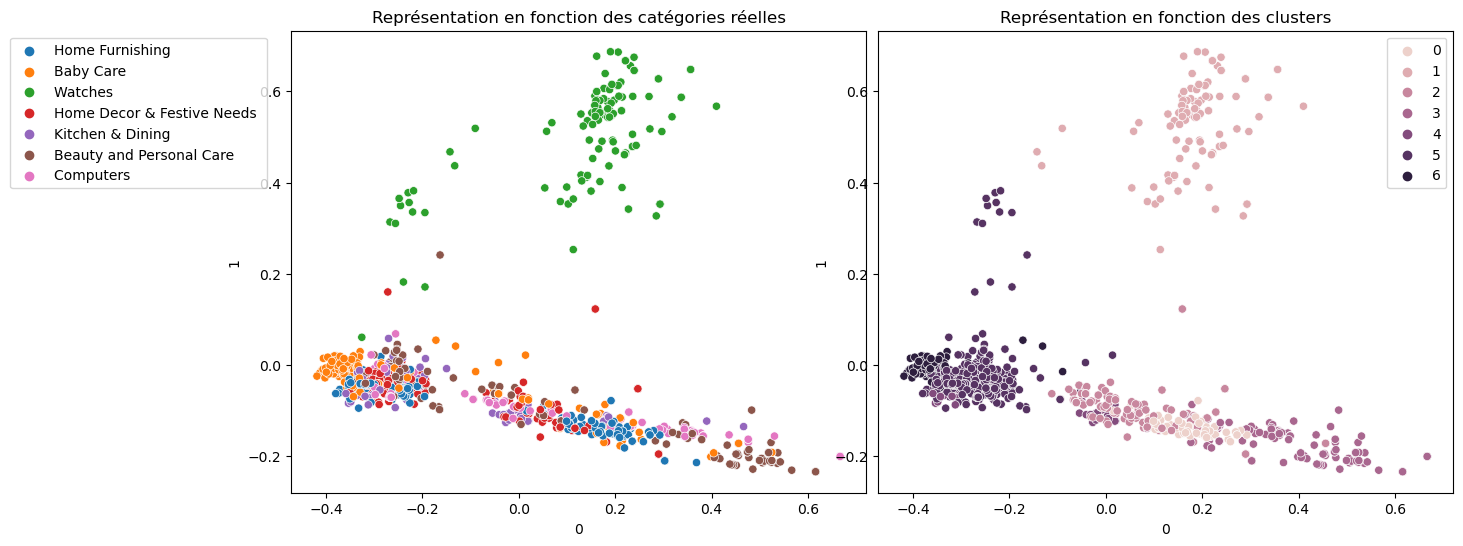

In [107]:
df_tfidfvect_reduced, c = pca_data(df_tfidfvect, scaler=StandardScaler(), n_comp=0.95)
y_pred, ARI = visu_categories(df_tfidfvect_reduced, y_true, reduction='PCA', figsize=(15, 6))

************************************************************************************************************************
Reduction : TSNE, ARI :  0.4055, time : 8.0
************************************************************************************************************************



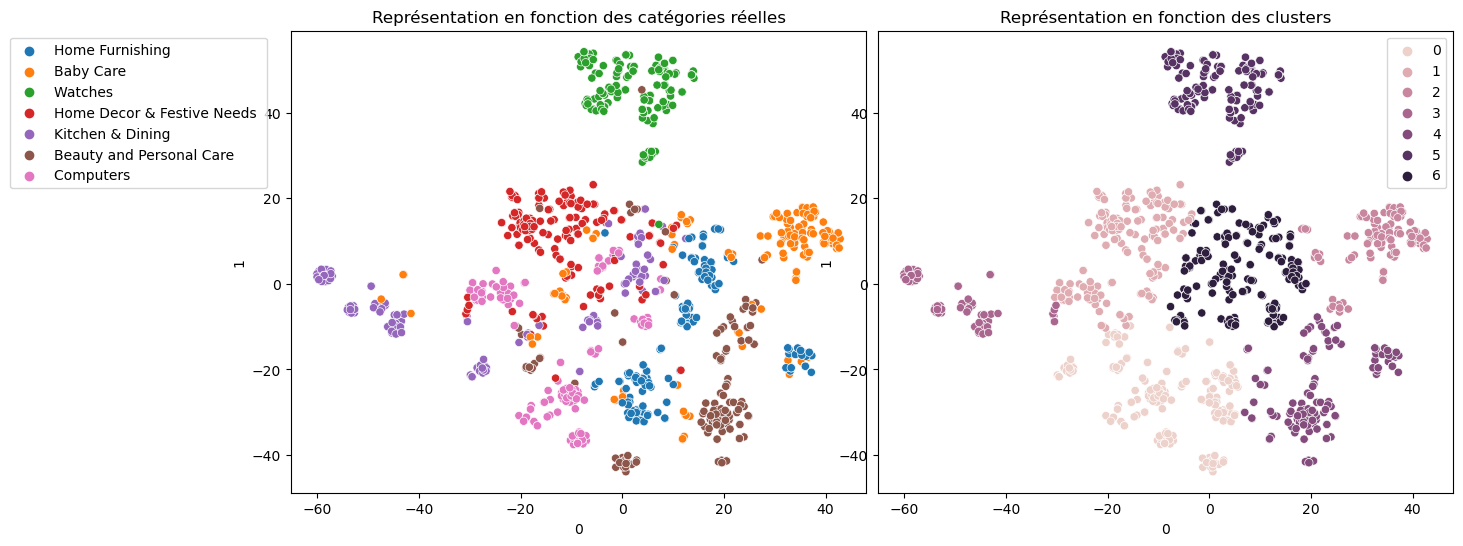

In [108]:
y_pred, ARI = visu_categories(df_tfidfvect_reduced, y_true, reduction='TSNE', figsize=(15, 6))

[[  5   0  13  15   1  34  82]
 [  0   0  21  80   0  49   0]
 [  0   0  25  68   0  57   0]
 [  0   0  76   0   0  74   0]
 [ 65   0   0   9   0  76   0]
 [  1   0  29   2  74  44   0]
 [  0 137   0   0   0  13   0]]
**************************************************
Correspondance calculée : [4 6 3 1 5 4 0]
Correspondance          : [4, 6, 3, 1, 5, 2, 0]

**************************************************
[[ 82  15  34  13   5   1   0]
 [  0  80  49  21   0   0   0]
 [  0  68  57  25   0   0   0]
 [  0   0  74  76   0   0   0]
 [  0   9  76   0  65   0   0]
 [  0   2  44  29   1  74   0]
 [  0   0  13   0   0   0 137]]
**************************************************
Métriques de performance par classe:.
**************************************************

              precision    recall  f1-score   support

           0       1.00      0.55      0.71       150
           1       0.46      0.53      0.49       150
           2       0.16      0.38      0.23       150
           3 

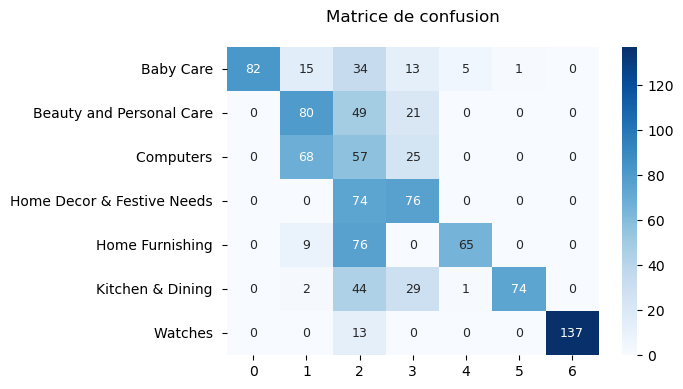

In [109]:
corresp=[4, 6, 3, 1, 5, 2, 0]
matrice_confusion(dfmarket,'category1',"cat_code", df_tfidfvect_reduced, corresp=corresp)
to_png(fig_name='confusion_tifidf')

In [110]:
# Ajout des résultats au dictionnaire
dict_result.update({'TF-IDF' : [f'{ARI}']})
dict_result

{'Bag-of-Words': ['0.3969'], 'TF-IDF': ['0.4055']}

#### <font color="#337da4" id="4.4">4.4 Approche word/sentence embedding classique avec Word2Vec (ou Glove ou FastText)</font>
---------------------------

L'approche word/sentence embedding classique consiste à transformer des mots ou des phrases en vecteurs de nombres réels (embeddings) dans un espace vectoriel continu. Ces embeddings capturent la sémantique et les relations sémantiques entre les mots ou les phrases, ce qui permet de représenter le sens des mots et des phrases de manière numérique.

Il existe deux variantes du Word2vec, les deux utilisent un réseau de neurones à 3 couches (1 couche d'entrée, 1 couche cachée, 1 couche de sortie) : Common Bag Of Words (CBOW) et Skip-gram.

**CBOW :** Le modèle est nourri par le contexte, et prédit le mot cible. Le résultat de la couche cachée est la nouvelle représentation du mot (ℎ1, ..., ℎ𝑁).

**Skip Gram :** Le modèle est nourri par le mot cible, et prédit les mots du contexte. Le résultat de la couche cachée est la nouvelle représentation du mot (ℎ1, ..., ℎ𝑁)

<img src='cbow_skipgram.png'>

- La couche Embedding va transformer chaque mot du contexte en vecteur d'embedding. La matrice W de l'embedding sera apprise au fur et à mesure que le modèle s'entraîne. Les dimensions résultantes sont : (lot, context_size, embedding).
- Ensuite, la couche GlobalAveragePooling1D permet de sommer les différents embedding pour avoir une dimension en sortie (batch_size, embedding).
- Enfin, La couche Dense de taille « voc_size » permet de prédire le mot cible.


Il existe plusieurs algorithmes populaires pour créer ces embeddings, dont les plus courants sont Word2Vec, GloVe (Global Vectors for Word Representation) et FastText.

***Word2Vec :***
Word2Vec est une méthode populaire pour apprendre des embeddings de mots basés sur des modèles de langage. Il existe deux approches principales dans Word2Vec : CBOW (Continuous Bag of Words) et Skip-gram.
CBOW (Continuous Bag of Words) : Cette approche prédit un mot cible à partir d'un contexte de mots voisins. Le modèle cherche à prédire le mot cible en utilisant les mots voisins comme entrées. Cela permet d'apprendre des embeddings de mots basés sur leur contexte.

***Skip-gram :*** Cette approche fait l'inverse du CBOW. Elle prédit le contexte (mots voisins) à partir d'un mot cible. Le modèle cherche à prédire les mots voisins à partir d'un mot cible donné. Cela permet d'apprendre des embeddings de mots qui captent le contexte d'un mot donné.

***GloVe (Global Vectors for Word Representation) :***
GloVe est une méthode qui combine les informations contextuelles et statistiques. Il utilise une matrice de co-occurrence pour capturer la fréquence des co-occurrences de chaque mot avec d'autres mots du corpus. Ensuite, il utilise des techniques d'optimisation pour apprendre des embeddings de mots qui préservent les relations statistiques entre les mots.

***FastText :***
FastText est une extension de Word2Vec qui ajoute la notion de subwords (sous-mots). Au lieu de traiter chaque mot comme une unité indivisible, FastText décompose les mots en sous-mots ou en n-grammes (combinaisons de caractères). Cela permet de représenter les mots rares ou inconnus à partir de leurs sous-mots communs. FastText est également capable de gérer les mots composés et les langues morphologiquement riches.



In [111]:
#Nomvre de coeur de l'ordinateur
import multiprocessing
coeur_ordi = multiprocessing.cpu_count() 
print("Nombre de coeurs de l'ordinateur : ", coeur_ordi  )

Nombre de coeurs de l'ordinateur :  8


In [112]:
# Preparation des données
import multiprocessing
import gensim
from gensim.models import Word2Vec

feat = 'clean_description'
phrases = dfmarket[feat].to_list()
phrases  = [gensim.utils.simple_preprocess(text) for text in phrases ]

In [113]:
# Modelisation & entrainement
print("Modelisation & entrainement ...")
model_Word2Vec = Word2Vec(min_count=3, # Ignores all words with total frequency lower than this, default 5
                     window=5, #The maximum distance between the current and predicted word within a sentence.
                     vector_size=100, # Dimensionality of the feature vectors.
                     epochs= 100,# Number of epochs training over corpus
                     workers=coeur_ordi-1)
model_Word2Vec.build_vocab(phrases)
model_Word2Vec.train(phrases, total_examples=model_Word2Vec.corpus_count, epochs=100)
model_vectors = model_Word2Vec.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Modelisation & entrainement ...
Vocabulary size: 2098
Word2Vec trained


In [114]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = max(len(x) for x in phrases)
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(phrases)
x_phrases = pad_sequences(tokenizer.texts_to_sequences(phrases),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4370


In [115]:
print("Create Embedding matrix ...")
w2v_size = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0
for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
               embedding_matrix[idx] = model_vectors[word]
word_rate = np.round(j/i,4)

print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.4802
Embedding matrix: (4370, 100)


In [116]:
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model

input=Input(shape=(len(x_phrases),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)
embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 354)]             0         
                                                                 
 embedding (Embedding)       (None, 354, 100)          437000    
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 437,000
Trainable params: 437,000
Non-trainable params: 0
_________________________________________________________________


In [117]:
embeddings = embed_model.predict(x_phrases)
embeddings.shape

33/33 [==============================] - 0s 4ms/step


(1050, 100)

Shape avant réduction :  (1050, 100)

Shape après réduction : (1050, 27)
Il faut 27 composantes pour expliquer 95% de la variance du dataset.

************************************************************************************************************************
Reduction : PCA, ARI :  0.0624, time : 1.0
************************************************************************************************************************



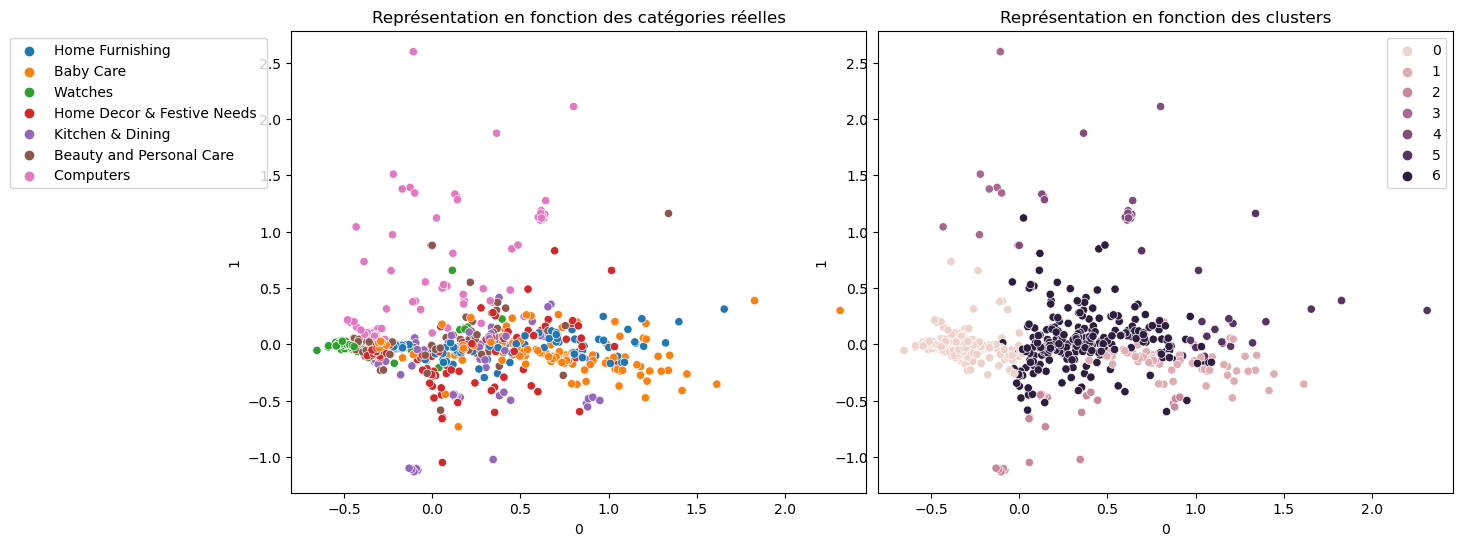

In [118]:
embeddings_reduced, c = pca_data(embeddings, scaler=StandardScaler(), n_comp=0.95)
y_pred, ARI = visu_categories(embeddings_reduced, y_true, reduction='PCA', figsize=(15, 6))

************************************************************************************************************************
Reduction : TSNE, ARI :  0.3345, time : 8.0
************************************************************************************************************************



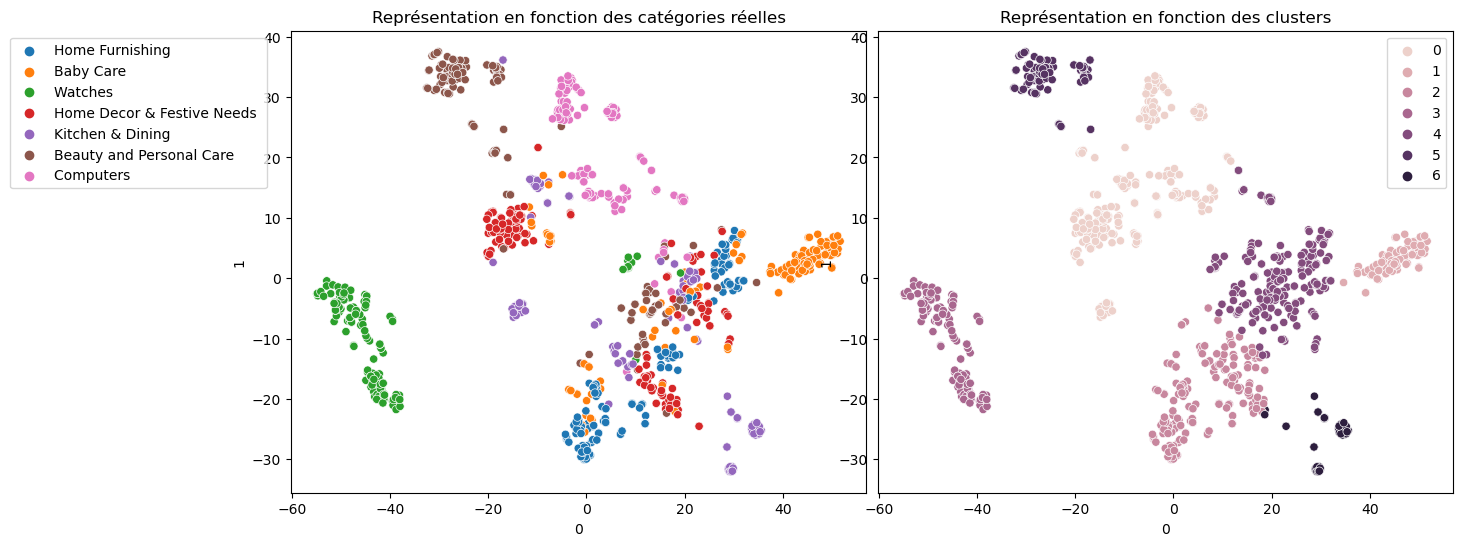

In [119]:
y_pred, ARI = visu_categories(embeddings_reduced, y_true, reduction='TSNE', figsize=(15, 6))

[[ 39  71   1   0   0   6  33]
 [111   0   0   0   2   1  36]
 [100   0   0  12  15   0  23]
 [ 84   0   4   0   0   2  60]
 [ 78   0   0   0   0  13  59]
 [ 59   0  52   0   0   0  39]
 [138   0   0   0   0   0  12]]
**************************************************
Correspondance calculée : [6 0 5 2 2 4 3]
Correspondance          : [6, 0, 5, 2, 3, 4, 1]

**************************************************
[[ 71  33   0   0   6   1  39]
 [  0  36   0   2   1   0 111]
 [  0  23  12  15   0   0 100]
 [  0  60   0   0   2   4  84]
 [  0  59   0   0  13   0  78]
 [  0  39   0   0   0  52  59]
 [  0  12   0   0   0   0 138]]
**************************************************
Métriques de performance par classe:.
**************************************************

              precision    recall  f1-score   support

           0       1.00      0.47      0.64       150
           1       0.14      0.24      0.17       150
           2       1.00      0.08      0.15       150
           3 

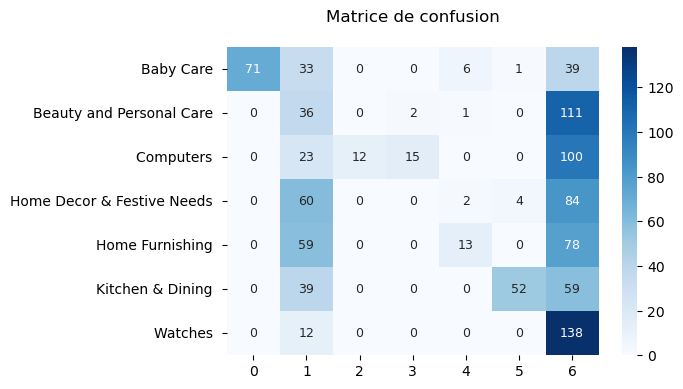

In [120]:
corresp=[6, 0, 5, 2, 3, 4, 1]
matrice_confusion(dfmarket,'category1', "cat_code", embeddings_reduced, corresp=corresp)
to_png(fig_name='confusion_Word2Vec')

In [121]:
dict_result.update({'Word2Vec' : [f'{ARI}']})
dict_result

{'Bag-of-Words': ['0.3969'], 'TF-IDF': ['0.4055'], 'Word2Vec': ['0.3345']}

#### <font color="#337da4" id="4.5">4.5 Approche BERT (Bidirectional Encoder Representations from Transformers)</font>
---------------------------

<h4>BERT</h4>

En traitement automatique du langage naturel, [***BERT***](https://fr.wikipedia.org/wiki/BERT_(mod%C3%A8le_de_langage)), acronyme anglais de ***Bidirectional Encoder Representations from Transformers***, est un modèle de langage développé par **Google en 2018**. Cette méthode a permis d'améliorer significativement les performances en traitement automatique des langues. Comme son nom l'indique ce modèle procède de façon bi-directionnel, ce qui lui permet d'avoir une bien meilleure compréhension du texte.

<h4>La méthode BERT</h4>

Au lieu de prédire le mot suivant dans une séquence, BERT utilise une nouvelle technique appelée **Masked LM (MLM)** : il masque aléatoirement des mots dans la phrase, puis il essaie de les prédire. Le masquage signifie que le modèle regarde dans les deux sens et qu'il utilise le contexte complet de la phrase, à gauche et à droite, afin de prédire le mot masqué. Contrairement aux modèles de langage précédents, il prend en compte les mots précédents et suivants en même temps. Les modèles existants manquaient cette approche « simultanée ».

***BERT*** est un modèle de type Transformers. Un transformer est un modèle qui fonctionne en effectuant un petit nombre constant d'étapes. À chaque étape, il applique un mécanisme d'attention pour comprendre les relations entre les mots de la phrase, quelles que soient leurs positions respectives


In [122]:
import os
import transformers
from transformers import AutoTokenizer, TFAutoModel

import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

os.environ["TF_KERAS"]='1'

In [123]:
def model_bert(base):
    
    # Création des phrases
    phrases = base['clean_description'].values
    phrases = [x for x in phrases]
    batch_size = 10
    max_length = 64
    model_type = 'bert-base-uncased'
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()
    model = TFAutoModel.from_pretrained(model_type)

    for step in range(len(phrases)//batch_size) :
        idx = step*batch_size
        
        input_ids = []
        token_type_ids = []
        attention_mask = []

        for sent in phrases[idx:idx+batch_size]:
           

            bert_inp = bert_tokenizer.encode_plus(sent,
                                                  add_special_tokens = True,
                                                  max_length = max_length,
                                                  padding = 'max_length',
                                                  return_attention_mask = True, 
                                                  return_token_type_ids = True,
                                                  truncation = True,
                                                  return_tensors = "tf"
                                                )

            input_ids.append(bert_inp['input_ids'][0])
            token_type_ids.append(bert_inp['token_type_ids'][0])
            attention_mask.append(bert_inp['attention_mask'][0])
        input_ids = np.asarray(input_ids)
        token_type_ids = np.asarray(token_type_ids)
        attention_mask = np.array(attention_mask)
        
        text_preprocessed = {"input_ids" : input_ids, 
                             "attention_mask" : attention_mask, 
                             "token_type_ids" : token_type_ids}
        outputs = model(text_preprocessed)
        last_hidden_states = outputs[0]
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    bert_features = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2) 
    
    
    return bert_features

In [124]:
bert_features = model_bert(dfmarket)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

temps traitement :  233.0


In [125]:
bert_features.shape

(1050, 768)

Shape avant réduction :  (1050, 768)

Shape après réduction : (1050, 130)
Il faut 130 composantes pour expliquer 95% de la variance du dataset.

************************************************************************************************************************
Reduction : PCA, ARI :  0.2687, time : 2.0
************************************************************************************************************************



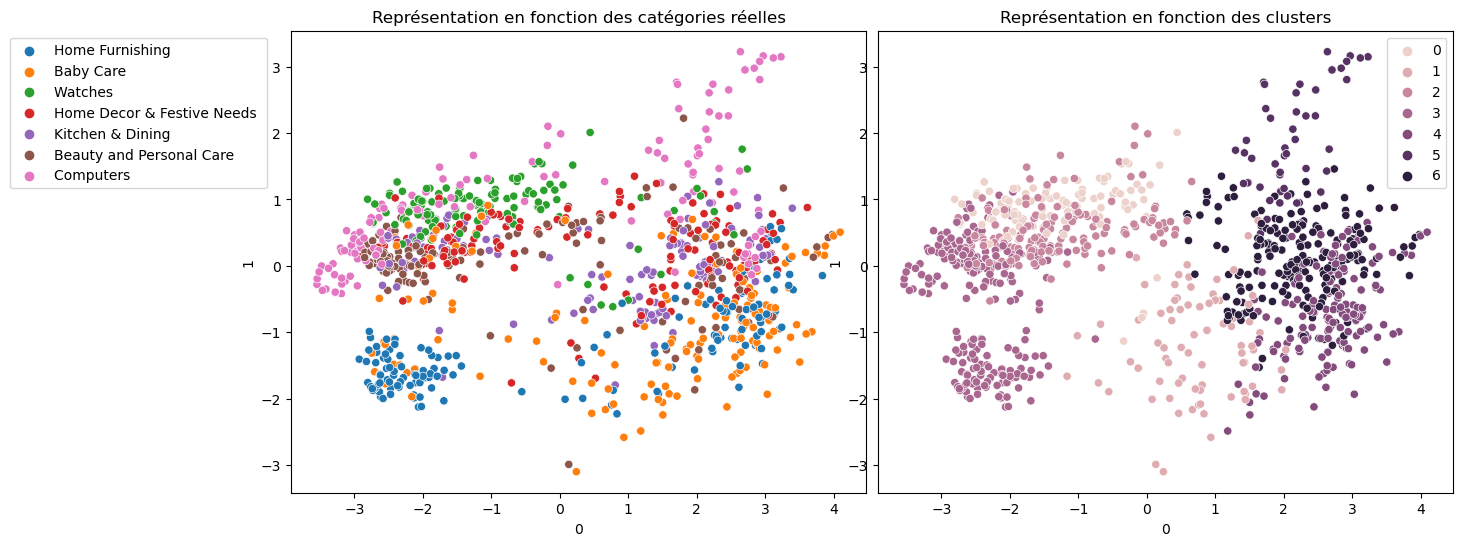

In [126]:
bert_features_reduced, c = pca_data(bert_features, scaler=StandardScaler(), n_comp=0.95)
y_pred, ARI = visu_categories(bert_features_reduced, y_true, reduction='PCA', figsize=(15, 6))

************************************************************************************************************************
Reduction : TSNE, ARI :  0.3407, time : 8.0
************************************************************************************************************************



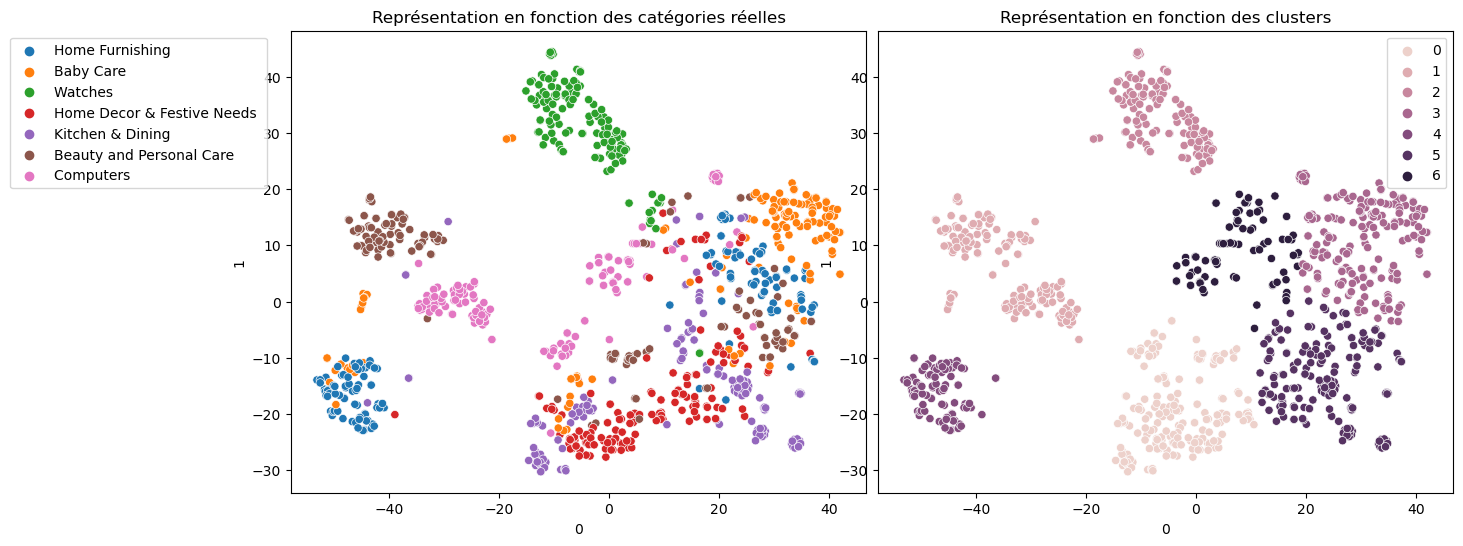

In [127]:
y_pred, ARI = visu_categories(bert_features_reduced, y_true, reduction='TSNE', figsize=(15, 6))

[[  3  21  14  21  79   1  11]
 [  0  12  18  79   5   2  34]
 [  0   1  23  68  11  44   3]
 [  0   9  69   0   5   3  64]
 [  0  15   0  74  40   0  21]
 [  0  17  47   4   1   2  79]
 [134   5   0   0   1   4   6]]
**************************************************
Correspondance calculée : [6 0 3 1 0 2 5]
Correspondance          : [6, 4, 3, 1, 0, 2, 5]

**************************************************
[[ 79  21   1  14  21  11   3]
 [  5  79   2  18  12  34   0]
 [ 11  68  44  23   1   3   0]
 [  5   0   3  69   9  64   0]
 [ 40  74   0   0  15  21   0]
 [  1   4   2  47  17  79   0]
 [  1   0   4   0   5   6 134]]
**************************************************
Métriques de performance par classe:.
**************************************************

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       150
           1       0.32      0.53      0.40       150
           2       0.79      0.29      0.43       150
           3 

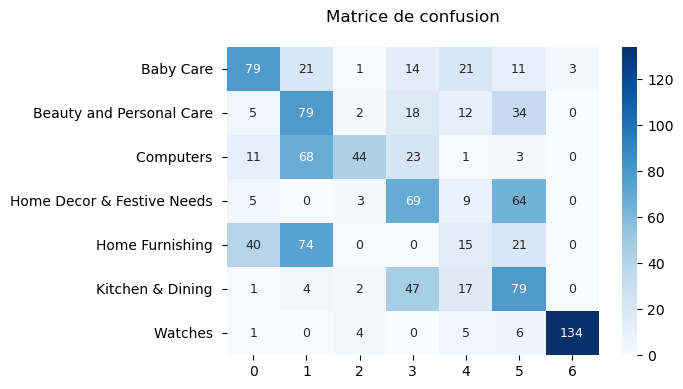

In [128]:
corresp=[6, 4, 3, 1, 0, 2, 5]
matrice_confusion(dfmarket,'category1',"cat_code", bert_features_reduced, corresp=corresp)
to_png(fig_name='confusion_bert')

In [129]:
# ARI, X_data, labels =model_ARI(bert_features, model_pca)
# model_viz(X_data, Y, labels, ARI)
# ARI, X_data, labels =model_ARI(bert_features, model_tsne)
# model_viz(X_data, Y, labels, ARI)
# matrice_confusion(dfmarket,'category1',"cat_code", bert_features, k=7)

In [130]:
# Ajout des résultats au dictionnaire
dict_result.update({'BERT' : [f'{ARI}']})

#### <font color="#337da4" id="4.6">4.6 Approche USE (Bidirectional Encoder Representations from Transformers)</font>
---------------------------

<h5>Définition</h5>

[Développé par google AI](https://blog.baamtu.com/word2vec-camembert-use-embedding-models/), USE produit les sentence embeddings. Les auteurs ont publié deux architectures USE, l'une basée sur le transformateur (transformer encoder) et l'autre est un deep average network (DAN). Selon eux, le USE à architecture à transformateur fonctionne légèrement mieux que le DAN mais il nécessité également plus de temps de calcul.

<h5>Transformer encoder (Encoder a Transformateur)</h5> 

Le modèle calcule d'abord les word embeddings, puis détermine le vecteur de la phrase en calculant la somme par élément des vecteurs de mots. L'entrée de l'encodeur est une séquence de tokens et la sortie est un vecteur de 512 de taille.

<h5>Deep average network</h5>

A l'entrée, on calcul d'abord la moyenne des  « word embeddings » ainsi que les encodages  de leur bigrams, avant de les envoyer à un réseau de neurone profond pour l'encodage  des phrases. L'entrée du modèle est également une séquence de tokens et la sortie d'un vecteur de 512 de taille.

In [131]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
phrases = dfmarket['clean_description'].to_list()
batch_size = 10

def model_use(phrases, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(phrases)//batch_size) :
        p = step*batch_size
        feat = embed(phrases[p:p+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

features_USE = model_use(phrases, batch_size)

Shape avant réduction :  (1050, 512)

Shape après réduction : (1050, 175)
Il faut 175 composantes pour expliquer 95% de la variance du dataset.

************************************************************************************************************************
Reduction : PCA, ARI :  0.3226, time : 1.0
************************************************************************************************************************



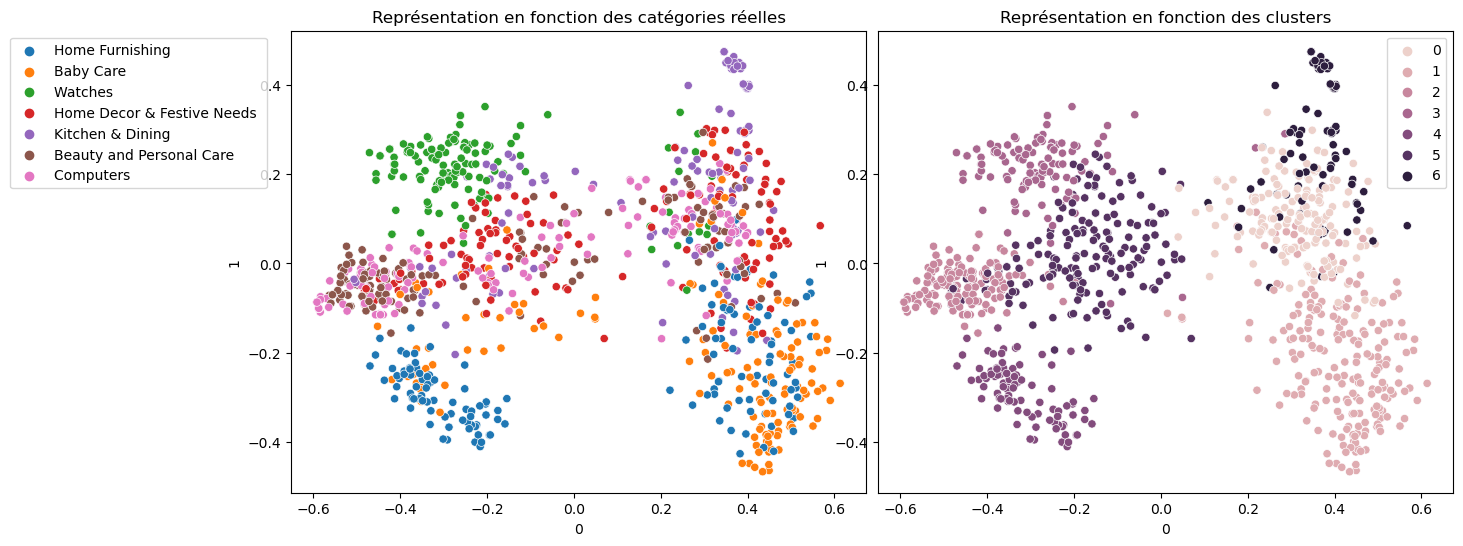

In [132]:
features_USE_reduced, c = pca_data(features_USE, scaler=StandardScaler(), n_comp=0.95)
y_pred, ARI = visu_categories(features_USE_reduced, y_true, reduction='PCA', figsize=(15, 6))

************************************************************************************************************************
Reduction : TSNE, ARI :  0.4119, time : 8.0
************************************************************************************************************************



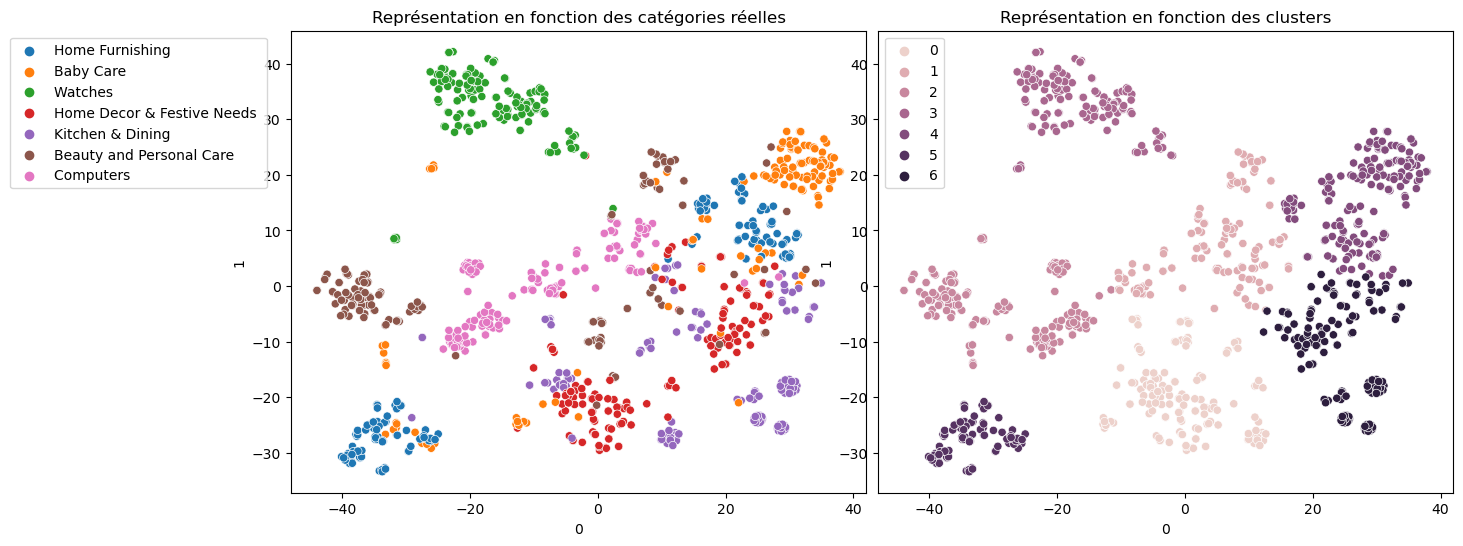

In [133]:
y_pred, ARI = visu_categories(features_USE_reduced, y_true, reduction='TSNE', figsize=(15, 6))

[[ 10 102   5   2  15  14   2]
 [ 39   8  80   0   0  21   2]
 [ 55   3  69   0   0  23   0]
 [ 28  15   1   0   0  75  31]
 [ 10  64   0   0  74   0   2]
 [ 22  10   2   0   1  47  68]
 [  4  10   6 130   0   0   0]]
**************************************************
Correspondance calculée : [2 0 1 6 4 3 5]
Correspondance          : [2, 0, 1, 6, 4, 3, 5]

**************************************************
[[102   5  10  14  15   2   2]
 [  8  80  39  21   0   2   0]
 [  3  69  55  23   0   0   0]
 [ 15   1  28  75   0  31   0]
 [ 64   0  10   0  74   2   0]
 [ 10   2  22  47   1  68   0]
 [ 10   6   4   0   0   0 130]]
**************************************************
Métriques de performance par classe:.
**************************************************

              precision    recall  f1-score   support

           0       0.48      0.68      0.56       150
           1       0.49      0.53      0.51       150
           2       0.33      0.37      0.35       150
           3 

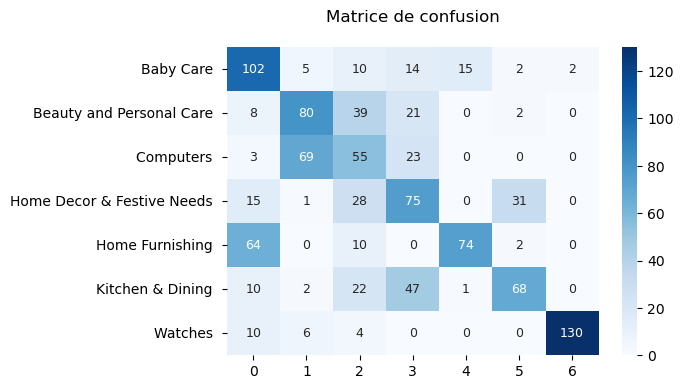

In [134]:
corresp=[2, 0, 1, 6, 4, 3, 5]
matrice_confusion(dfmarket,'category1',"cat_code", features_USE_reduced, corresp=corresp)
to_png(fig_name='confusion_use')

In [135]:
# Ajout des résultats au dictionnaire
dict_result.update({'USE' : [f'{ARI}']})
dict_result

{'Bag-of-Words': ['0.3969'],
 'TF-IDF': ['0.4055'],
 'Word2Vec': ['0.3345'],
 'BERT': ['0.3407'],
 'USE': ['0.4119']}

#### <font color="#337da4" id="4.7">4.7 Comapraison des approches</font>
---------------------------

In [136]:
# On crée un dictionnaire qui va reprendre tous nos résultats
df_result = pd.DataFrame.from_dict(dict_result, orient = 'index', columns = ['ARI'])
# On ordonne nos données
df_result.sort_values('ARI', ascending=False, inplace=True)
df_result.index

Index(['USE', 'TF-IDF', 'Bag-of-Words', 'BERT', 'Word2Vec'], dtype='object')

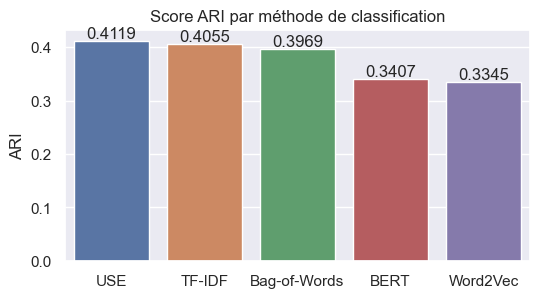

In [137]:
df_result['ARI'] = pd.to_numeric(df_result['ARI'])
sns.set(rc={'figure.figsize':(6,3)})
g = sns.barplot(x=df_result.index, y=df_result['ARI'])
g.set(title='Score ARI par méthode de classification')

# Ajouter les étiquettes de données sur les barres
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., 
                                     p.get_height()), ha='center', va='center', xytext=(0, 5), 
               textcoords='offset points')

plt.show()


--------
La méthode **USE** présente le meilleur score **ARI**.     
Elle est suivie de la méthode  **TF-IDF**.

In [138]:
# !pip list>requirements_NLP.txt